# Richter's Predictor

Kyongmin So 

[LinkedIn](https://www.linkedin.com/in/kyongminso/)|[GitHub](https://github.com/kyongminso)

<img src= "./Images/nepal-quake-map-data.jpeg">

## Business Problem
----------------------------------------------------------------------------
A lot of the homes in Nepal are built by poor materials and in 2015, people were not ready for the earthquake. My model is going to predict the damage of a building in Nepal based off of the features of the building. Based off what my model predicts, people could be better prepared for an earthquake and can go reinforce the buildings.

## Business Understanding
-------------------------

In April 2015, an earthquake (also known as the **Gorkha Earthquake**) hit central Nepal with a magnitude of 7.8. It killed an estimate of 9 thousand people and injured more than 20 thousand people. It was the worst natural disaster to hit Nepal since the 1930's. 

This earthquake flattened out countless villages and communities throughtout Nepal. Nepal is already one of the poorest Asian countries with a GDP of about $20 billion dollars and had no abilities to reconstruct themselves needing to rely on foreign aid to get back up on their feet. This country was absolutely not prepared for this catastrophe and they paid massively for their consequences for not being prepared.


Something that intrigued me was that that 2 years prior to the earthquake in 2013, a seismologist named Vinod Kumar Gaur was interviewed and he was quoted saying: "Calculations show that there is sufficient accumulated energy, now to produce an 8 magnitude earthquake. I cannot say when. It may not happen tomorrow, but it could possibly happen sometime this century, or wait longer to produce a much larger one." 

People were aware of the earthquake but they were confident that the earthquake wouldn't happen for a long time and the people of Nepal eventually paid the price for it. Part of the reason why I was so interested in doing this is to see what the buildings were made out of and see if there are any connections to the damage of the building and the material used to construct the buildings. Hopefully with my studies,I can figure out what building materials are detrimental in earthquakes, and make sure that any other buildings made of the same material are documented and are best restructured so that the damage when an earthquake happens the aftermath will not be that detrimental.


[Source](https://en.wikipedia.org/wiki/April_2015_Nepal_earthquake)


## Overview 
---------------------
This model is going to predict the damage of the buildings based off what the features of the building are. 

###### Modeling 

The models that I will be running for this project are: 

- **Logistic Regression (1st Simple Model)** 
- **Random Forests**
- **XG-Boost** 
- **K-Nearest Neighbors**


I am using these models because these are the basic classification models I can use. These are good for binary classification models, but these can also be used for multi-class classification. These models are used on the trained dataset and are filled with features describing the building.

## Data Understanding
-------------------------------
All of my data was obtained through this website [Driven Data](https://www.drivendata.org/competitions/57/nepal-earthquake/) but you will need an account to access the information. I will not use all the features and if I start dropping anything, I will explain why I dropped certain features.


Our dataset is filled with features describing each buildings with columns such as: 
- **age**
- **area_percentage**
- **has_superstructure_rc_engineered**
- and more.

Our target is the **damage_grade** and it is based off of 3 levels. Each building is associated with one of these 3 answers.
- 1 = Least Damage 
- 2 = Middle Damage 
- 3 = Heavy Damage 


As for my other features,as you move on through the notebook, all of my features will be explained and dropped as you move on. 


**Something to know**

This data is based off of damages from an earthquake that was registered at a 7.8 ~ 8.0 earthquake and the Richter Scale max is 8.8 or 8.9 (depending on who you ask). My model will predict off of earthquakes that are on the more severe and dangerous side of the scale so my findings will be based off of earthquakes that are stronger than 7.0. 

**Scoring Metrics**

I am predicting the level of damage from a scale of 1 to 3. The level of damage is an ordinal so that means the order matters. This can be viewed as a classification or an ordinal regression problem.

We will be using the the F1 score which balances the precision and recall of a classifier. Normally we use the F1 score for binary situations but since we have three labels we are dealing with, we will be using the **micro** averaged F1 score. Micro F1 is used to assess the quality of multi-label binary problems. It basically measures the F1-score of the aggregated contributions of all classes. 

Just a refresher: 
- Precision : Out of all of the positive predictions, how many are really positive?
- Recall : Of all the true positive cases, how many were predicted positive? 
- F1 Score: The harmonic mean between the Precision and the Recall 

Basically, **micro F1 score** performed by first calculating the sum of all true positives, false positives, and false negatives over all the labels. Then I compute the micro-precision and micro-recall from the sums.Finally we compute the harmonic mean to get the micro F1-score.

I will also find the **macro** F1 score too because why not? **macro** scores are just gathering all the f1 scores per class and dividing it by the number of classes.

## Data Preparation 

Before I can work on my models, I need to be able to clean my data and make sure I have the dataframe I want to work with. Better the data, the better the model.

# Data Cleaning

Making our necessary imports.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import  OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
     classification_report
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.metrics import plot_confusion_matrix, f1_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score,cross_val_predict, cross_validate
import xgboost
#Used for the heatmap
!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report
import matplotlib
#Import for my model f1 scores
from functions import * 
from seaborn import countplot

**Disclaimer**
The functions in the functions python file were created by [Saad Saeed](https://github.com/ssaeed85/dsc-ph3-TanzaniaWaterWell/blob/main/Notebook_Modeling.ipynb).

Let's dig into the data!

# Data Exploration

In [2]:
#Target isn't in this specific dataframe. 
df = pd.read_csv('Data/train_values (2).csv')
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Dropping the building ID column because we already got the same 
#column name in the main dataframe. 
target = pd.read_csv('Data/train_labels (1).csv')
target = target.drop(columns='building_id')
target

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
260596,2
260597,3
260598,3
260599,2


In [4]:
#I now want to combine the main dataframe with the target just so I can 
#get a better visualization of what I am working with.
dataframes = [df, target]

#We are going to be combining our two dataframes off of our columns
combined_df = pd.concat(dataframes, axis = 1)
combined_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [5]:
#Making sure whatever is in our columns matches the type they're 
#supposed to be.
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Now that I have combined our dataframe, I now want to see if there are any null values.

In [6]:
combined_df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

We noticed that there were no null values which is a huge relief, but there are features that we need explore. For sure we will not have to use all of these features, so we need to know what to keep, and what to drop. 

## Target Value 

Before I start dropping features, I want to know what my target values look like. I want to know, how many 1's, 2's, and 3's there are. 

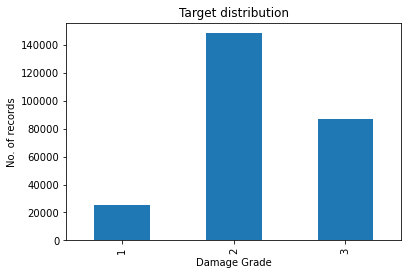

In [7]:
combined_df['damage_grade'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Damage Grade')
plt.ylabel('No. of records')
plt.savefig('Images/target_histogram_2.png', bbox_inches='tight')
plt.title('Target distribution');

In [8]:
#Getting the count for the target column.
combined_df['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

Majority of the damages are a level 2 damage grade, with 3 and 1 following right behind it.

### Duplicates

Something I noticed that I forgot to check was to see if I had any duplicates in my data or not. I wanted to check to see if I had any duplicates using the **building_id** column. 

In [9]:
combined_df[combined_df['building_id'].duplicated()]

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade


It seems like I don't have any duplicates, but to double check, I wanted to check and see if all the ID's are unique values. The number should match the rows of our dataframe, which is 260,601. 

In [10]:
len(combined_df['building_id'].unique())

260601

Perfect! No duplicates and all of my rows are unique!

### Categorizing my column

An important feature for me to use is the **age** columns. Let me see what I am working with.

In [11]:
combined_df['age'].unique()

array([ 30,  10,  25,   0,  15,  20,  45,  55,   5,  40,  80,  60,  35,
        70,  50,  65, 100,  75,  85, 190, 995, 105,  90, 120,  95, 110,
       115, 150, 200, 130, 125, 140, 155, 160, 175, 135, 145, 195, 180,
       165, 170, 185])

It looks like that my **age** column has already been put into bins, but they look a little too spread out.

,Number,Percentage
,,
Zeroes,"26,041",9.99 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,42,0.02 %
Mean,26.54,-
Median,15.00,-


,Value Count,% Value Count
10,38896,14.925499
15,36010,13.818059
5,33697,12.930495
20,32182,12.349147
0,26041,9.992671
25,24366,9.349926
30,18028,6.917855
35,10710,4.109731
40,10559,4.051788
50,7257,2.784717


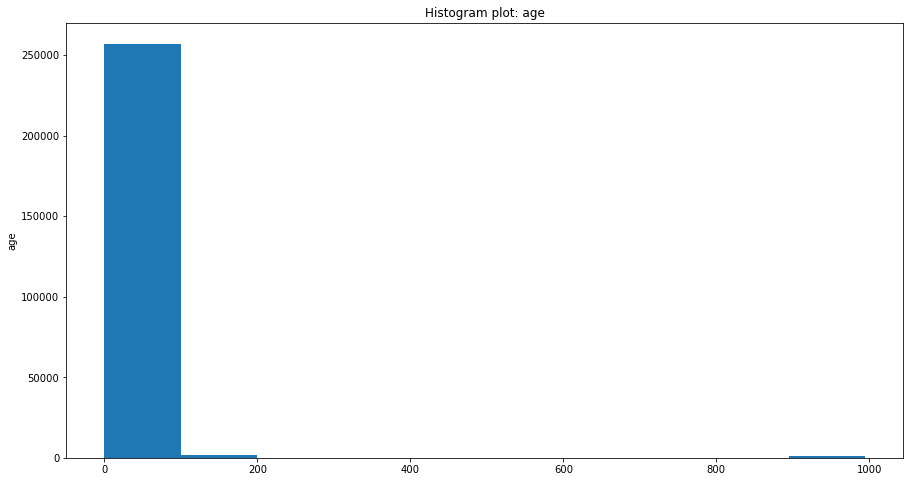

In [12]:
colInfo(combined_df['age'])

### Feature Exploration

In [13]:
#Pulling up our dataframe to see again
combined_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


### Starting to drop our columns

I want to focus on building a model that predicts building damages based off of what the structures are made out of. Therefore, I will drop some columns that that has no connection to the building materials. This will the be the main reasons as to why I will drop some of my columns.

I got my data from this [website](https://www.drivendata.org/competitions/57/nepal-earthquake/page/136/). In this site, it gives us the details for every feature and I need to start determining if each feature is worth keeping or not. 

The website is useful, but it did not go into full detail on what some of the features were. The geo_level columns were one of the examples that I had an issue because what constituted the difference between **geo_level_1_id**	& **geo_level_2_id**? This [website](https://becominghuman.ai/how-to-shine-in-a-data-science-challenge-an-example-from-drivendata-47a526fa38ea) did a better job of explaining the different geo levels. 

From my research: 
- geo_level_1_id
    - City
- geo_level_2_id
    - District
- geo_level_3_id
    - Neighborhood

This was the best explanation I could find on these certain columns. I will be dropping **geo_level_2_id** and **geo_level_3_id**. These columns will be part of the **next step** for me and hopefully I will be able to figure out the locations and names for this column.

In [14]:
#I will be dropping geo_level_2, and geo_level_3

combined_df = combined_df.drop(columns=['geo_level_2_id', 'geo_level_3_id'])
combined_df

,building_id,geo_level_1_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,2,30,6,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,2,10,8,7,o,r,n,x,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,2,10,5,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,2,10,6,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,3,30,8,9,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1,55,6,3,n,r,n,f,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,2,0,6,5,t,r,n,f,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,3,55,6,7,t,r,q,f,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,2,10,14,6,t,r,x,v,...,0,0,0,0,0,0,0,0,0,2


I am going to start dropping more features. 

I could not find any information on the **area_percentage** nor the **height_percentage** so I dropped those features. I also dropped the **count_families** because knowing how many families live in the building is unnecessary, and same with the **count_floors_pre_eq** because knowing the count of floors isn't important.  

In [15]:
#Dropping some more columns!
combined_df = combined_df.drop(columns=['area_percentage', 'height_percentage','count_families', 
                                        'count_floors_pre_eq'])
combined_df

,building_id,geo_level_1_id,age,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,30,t,r,n,f,q,t,d,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,10,o,r,n,x,q,s,d,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,10,t,r,n,f,x,t,d,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,10,t,r,n,f,x,s,d,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,30,t,r,n,f,x,s,d,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,55,n,r,n,f,j,s,q,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,0,t,r,n,f,q,s,d,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,55,t,r,q,f,q,s,d,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,10,t,r,x,v,s,j,d,...,0,0,0,0,0,0,0,0,0,2


Bringing back the updated heatmap!

There are columns that show us the secondary uses for the buildings that  I have no use for. It just states what the building was used for. I have no interest in keeping those columns so I will be dropping them.

In [16]:
#Dropping all of the secondary usage columns.
combined_df = combined_df.drop(columns=['has_secondary_use', 
                                        'has_secondary_use_agriculture',
                                        'has_secondary_use_hotel', 
                                        'has_secondary_use_rental',
                                       'has_secondary_use_institution', 
                                       'has_secondary_use_school',
                                       'has_secondary_use_industry', 
                                       'has_secondary_use_health_post',
                                       'has_secondary_use_gov_office', 
                                       'has_secondary_use_use_police', 
                                       'has_secondary_use_other'])
combined_df

,building_id,geo_level_1_id,age,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,damage_grade
0,802906,6,30,t,r,n,f,q,t,d,...,0,0,0,0,0,0,0,0,v,3
1,28830,8,10,o,r,n,x,q,s,d,...,0,0,0,0,0,0,0,0,v,2
2,94947,21,10,t,r,n,f,x,t,d,...,0,0,0,0,0,0,0,0,v,3
3,590882,22,10,t,r,n,f,x,s,d,...,0,0,0,1,1,0,0,0,v,2
4,201944,11,30,t,r,n,f,x,s,d,...,0,0,0,0,0,0,0,0,v,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,55,n,r,n,f,j,s,q,...,0,0,0,0,0,0,0,0,v,2
260597,669485,17,0,t,r,n,f,q,s,d,...,0,0,0,0,0,0,0,0,v,3
260598,602512,17,55,t,r,q,f,q,s,d,...,0,0,0,0,0,0,0,0,v,3
260599,151409,26,10,t,r,x,v,s,j,d,...,0,0,1,0,0,0,0,0,v,2


Looking at my **age**, I am going to just drop this feature because I believe it won't help me with my data.

In [17]:
combined_df = combined_df.drop(columns='age')
combined_df

,building_id,geo_level_1_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,damage_grade
0,802906,6,t,r,n,f,q,t,d,1,...,0,0,0,0,0,0,0,0,v,3
1,28830,8,o,r,n,x,q,s,d,0,...,0,0,0,0,0,0,0,0,v,2
2,94947,21,t,r,n,f,x,t,d,0,...,0,0,0,0,0,0,0,0,v,3
3,590882,22,t,r,n,f,x,s,d,0,...,0,0,0,1,1,0,0,0,v,2
4,201944,11,t,r,n,f,x,s,d,1,...,0,0,0,0,0,0,0,0,v,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,n,r,n,f,j,s,q,0,...,0,0,0,0,0,0,0,0,v,2
260597,669485,17,t,r,n,f,q,s,d,0,...,0,0,0,0,0,0,0,0,v,3
260598,602512,17,t,r,q,f,q,s,d,0,...,0,0,0,0,0,0,0,0,v,3
260599,151409,26,t,r,x,v,s,j,d,0,...,0,0,1,0,0,0,0,0,v,2


We dropped the features but now I am running into another problem. Some of the features listed have characters listed for their values. I know I will need to one hot encode these laters, but for now I need to rewrite these single letter characters into actual words.

In [18]:
#Let's start with our first column and see what the letters we are dealing with.

combined_df['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [19]:
#We are now looking into the foundation types.
combined_df['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [20]:
#We are now looking into the roof types. 
combined_df['roof_type'].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

This is obviously going to be a lot harder than I thought. I ended up Googling to see if I could find the answers for these single letters and I found a separate dataset that contained the types of many of the features that I was looking for. I got these datasets from this [website](https://eq2015.npc.gov.np/#/download) using the buildings dataset. 

In [21]:
#Bringing in our new dataframe to compare building,foundation, and roof types.
building_df = pd.read_csv('Data/csv_building_structure.csv')
pd.set_option('display.max_columns', 50)
building_df

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,2,0,60,165,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-2 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762102,366709001251,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762103,366709001261,36,3603,360302,2,0,35,342,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762104,366709001271,36,3603,360302,2,0,19,306,18,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction


We got our two dataframes to see if I can change the names of the single alphabet to words, I am doing a sanity check to see what I am working with. 

In [22]:
building_df['foundation_type'].value_counts().keys().to_list()

['Mud mortar-Stone/Brick',
 'Bamboo/Timber',
 'Cement-Stone/Brick',
 'RC',
 'Other']

In [23]:
combined_df['foundation_type'].value_counts().keys().to_list()

['r', 'w', 'u', 'i', 'h']

The **foundation_type** did not help me at all. At least the the number of keys match for both columns, but so far I got nothing for this column.

We are going to check the **ground_floor_type** to see if there is any correlation between the different dataframes. 

In [24]:
building_df['ground_floor_type'].value_counts().keys().to_list()

['Mud', 'RC', 'Brick/Stone', 'Timber', 'Other']

In [25]:
combined_df['ground_floor_type'].value_counts().keys().to_list()

['f', 'x', 'v', 'z', 'm']

Same thing like **foundation_type**, **ground_floor_type** is difficult to intrepret. Let me look at other features and see if there is any intrepretability. 

We are going to be checking **land_surface_condition** to see if I can translate the data.

In [26]:
building_df['land_surface_condition'].value_counts().keys().to_list()

['Flat', 'Moderate slope', 'Steep slope']

In [27]:
combined_df['land_surface_condition'].value_counts().keys().to_list()

['t', 'n', 'o']

Okay, I got no luck with **land_surface_condition** either. 

I came to a realization that this extra dataframe (**building_df**) is no help to me. It's great to see what the values of the features are, but there is no way for me to connect the two dataframes together. Overall, I'm back to where I started and I will have to move on with what I know. Features such as **foundation_type** and **land_surface_condition** are absolutely vital, so I won't be dropping them, but I will have to deal with the single lettered words in my columns. Figuring out what each string characters will be part of the **next steps** as well because I will need more time to research what the individual strings are.

Going back, let's see where we are again with our dataframe.

In [28]:
combined_df

,building_id,geo_level_1_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,damage_grade
0,802906,6,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,3
1,28830,8,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,2
2,94947,21,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,3
3,590882,22,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,2
4,201944,11,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,2
260597,669485,17,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,3
260598,602512,17,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,3
260599,151409,26,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,2


Since we're back to our original dataframe, I will need to do one more run through and figure out what I do not need. Below is the reason why I dropped my features:

- **building_id**
    - I am dropping the building_id because a unique identifier won't protect certain buildings from disasters.
- **other_floor_type** 
    - This is describing the other floor types besides the ground floors and I do not need that data because the ground floor is what matters the most in an earthquake.
- **position**
    - I had no idea what to do with this column because it's the position of the homes. 
- **plan_configuration**
    - This is the building configuration. I do not need this column either because specific building configurations will not protect you. 
- **legal_ownership_status**
    - I do not care about the ownership status of the buildings. Ownership status does not protect you more from an earthquake.

In [29]:
#I am going to drop more columns that I will not need.
combined_df = combined_df.drop(columns=['building_id', 'other_floor_type', 'position', 
                                        'plan_configuration','legal_ownership_status'])
combined_df

,geo_level_1_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,6,t,r,n,f,1,1,0,0,0,0,0,0,0,0,0,3
1,8,o,r,n,x,0,1,0,0,0,0,0,0,0,0,0,2
2,21,t,r,n,f,0,1,0,0,0,0,0,0,0,0,0,3
3,22,t,r,n,f,0,1,0,0,0,0,1,1,0,0,0,2
4,11,t,r,n,f,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,n,r,n,f,0,1,0,0,0,0,0,0,0,0,0,2
260597,17,t,r,n,f,0,1,0,0,0,0,0,0,0,0,0,3
260598,17,t,r,q,f,0,1,0,0,0,0,0,0,0,0,0,3
260599,26,t,r,x,v,0,0,0,0,0,1,0,0,0,0,0,2


### Checking to see if my columns are categorical or not.

It seems like my numbers are not continuous and I need to check to see if my numbers are binary or not. I also need to check and see if my total sum of my binary numbers must equal 260,601 rows. This is to make sure that my categories only have the value of 0 and 1.

In [30]:
#Checking to see if I only have 0 and 1. 
combined_df['has_superstructure_adobe_mud'].value_counts()

0    237500
1     23101
Name: has_superstructure_adobe_mud, dtype: int64

In [31]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_adobe_mud'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"237,500",91.14 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.09,-
Median,0.00,-


,Value Count,% Value Count
0,237500,91.135491
1,23101,8.864509


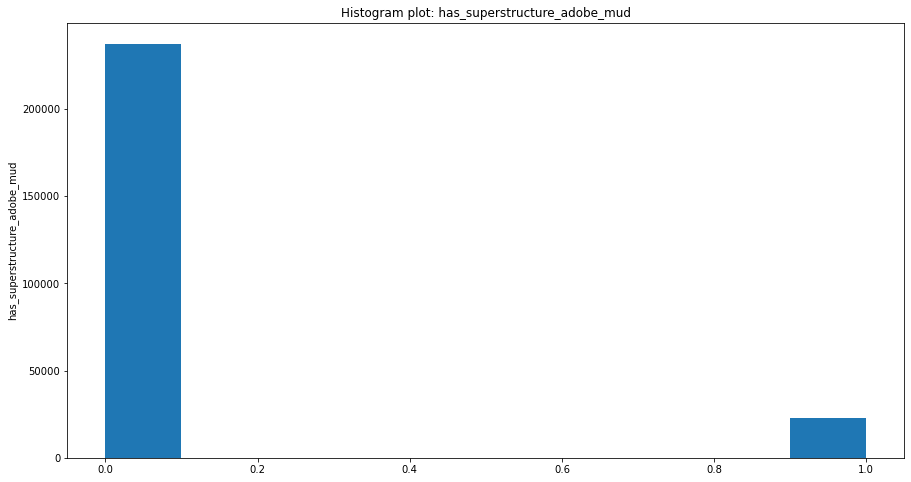

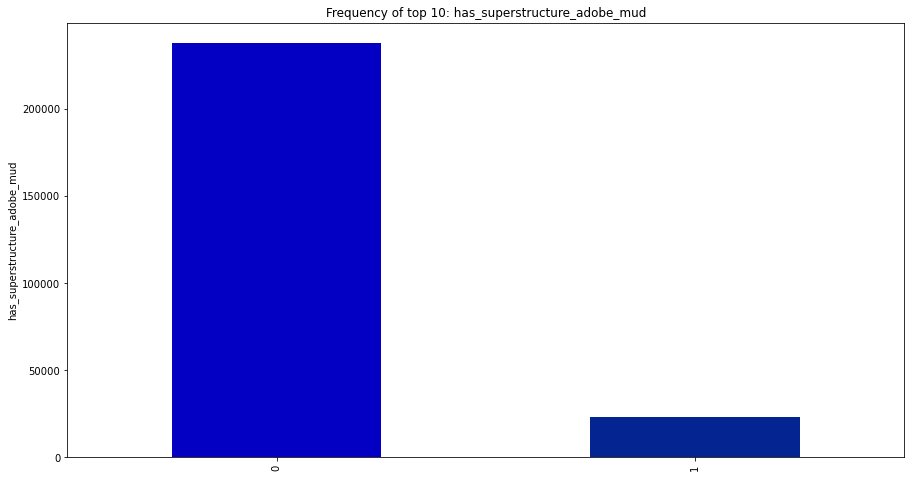

In [32]:
#Just to double check, I will call in my function to make sure this column looks fine. I will be doing 
#this for all of my columns.
colInfo(combined_df['has_superstructure_adobe_mud'])

**has_superstructure_adobe_mud** looks good.

In [33]:
#Checking to see if I only have 0 and 1. 
combined_df['has_superstructure_mud_mortar_stone'].value_counts()

1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

In [34]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_mud_mortar_stone'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"62,040",23.81 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.76,-
Median,1.00,-


,Value Count,% Value Count
1,198561,76.193491
0,62040,23.806509


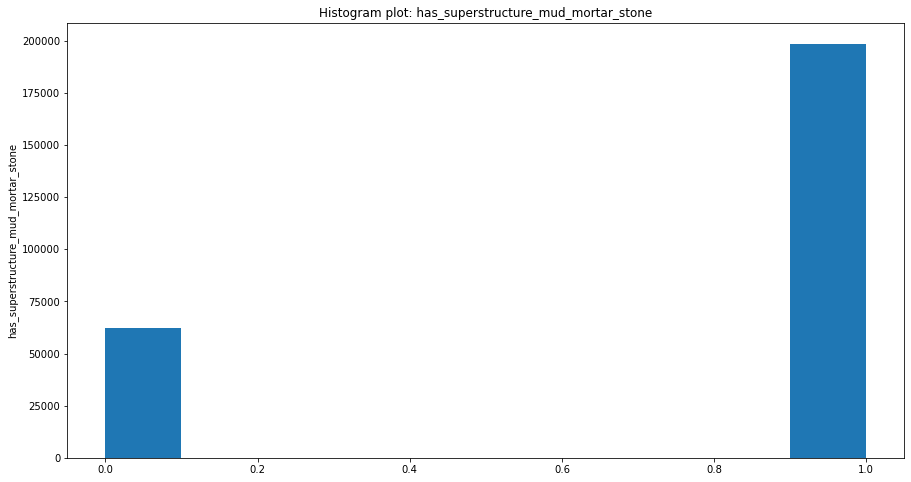

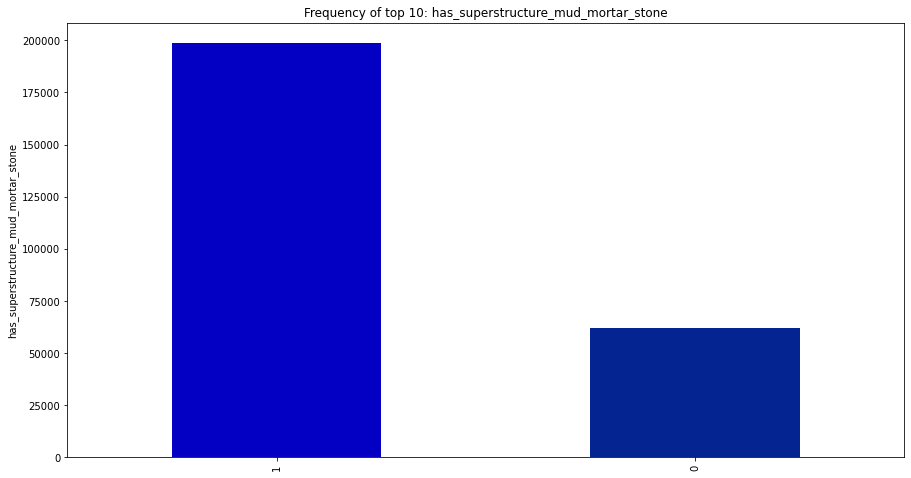

In [35]:
colInfo(combined_df['has_superstructure_mud_mortar_stone'])

**has_superstructure_mud_mortar_stone** looks good.

In [36]:
#Checking to see if I only have 0 and 1. 
combined_df['has_superstructure_stone_flag'].value_counts()

0    251654
1      8947
Name: has_superstructure_stone_flag, dtype: int64

In [37]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_stone_flag'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"251,654",96.57 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.03,-
Median,0.00,-


,Value Count,% Value Count
0,251654,96.566782
1,8947,3.433218


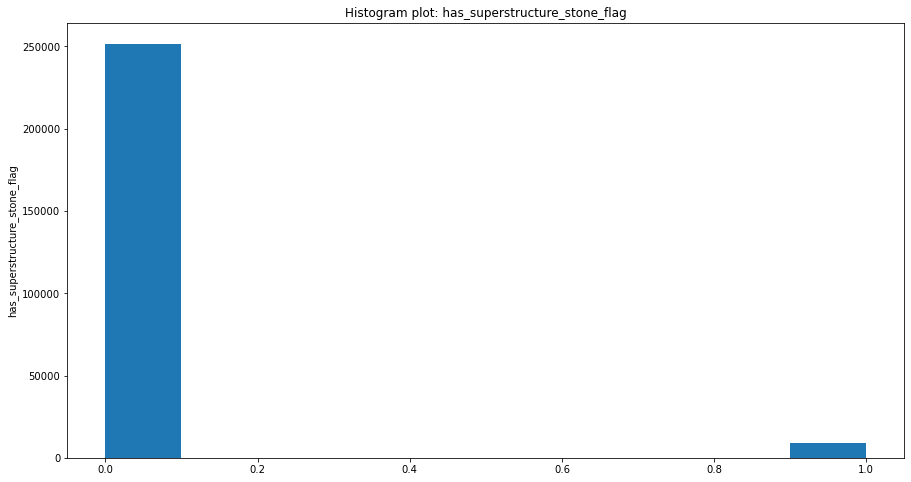

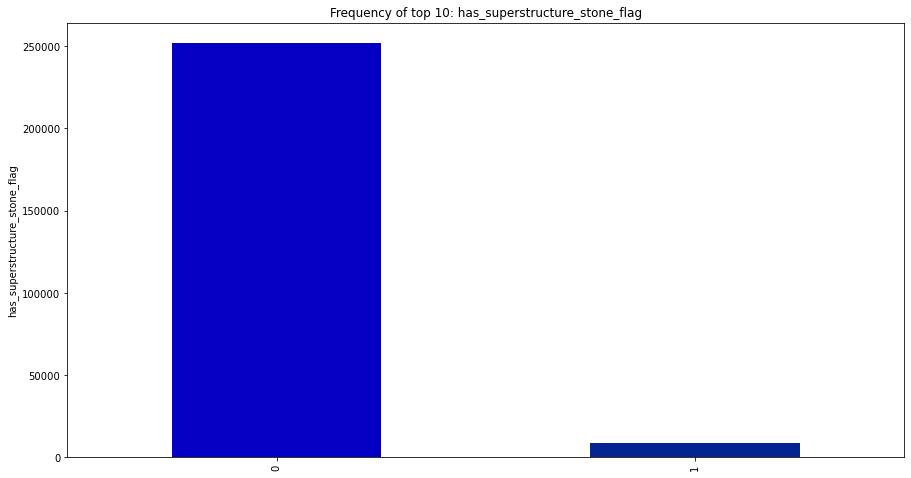

In [38]:
colInfo(combined_df['has_superstructure_stone_flag'])

**has_superstructure_stone_flag** looks good.

In [39]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_cement_mortar_stone'].value_counts()

0    255849
1      4752
Name: has_superstructure_cement_mortar_stone, dtype: int64

In [40]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_cement_mortar_stone'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"255,849",98.18 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.02,-
Median,0.00,-


,Value Count,% Value Count
0,255849,98.176523
1,4752,1.823477


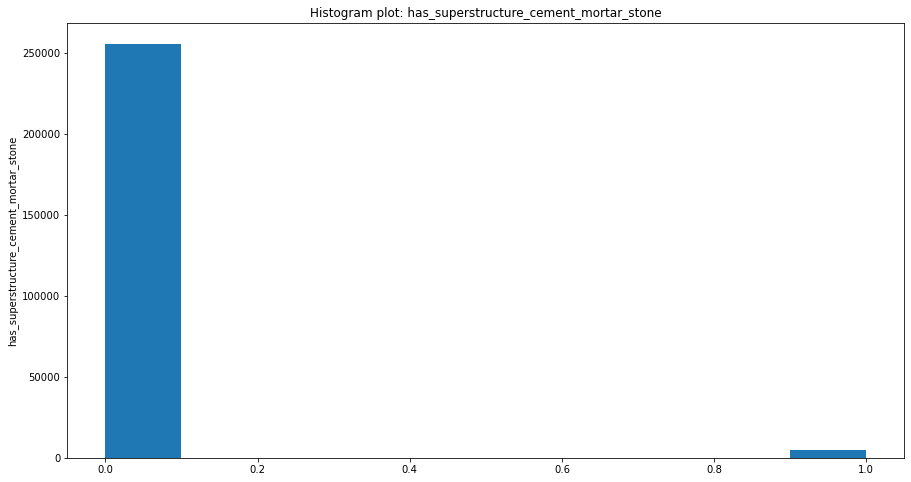

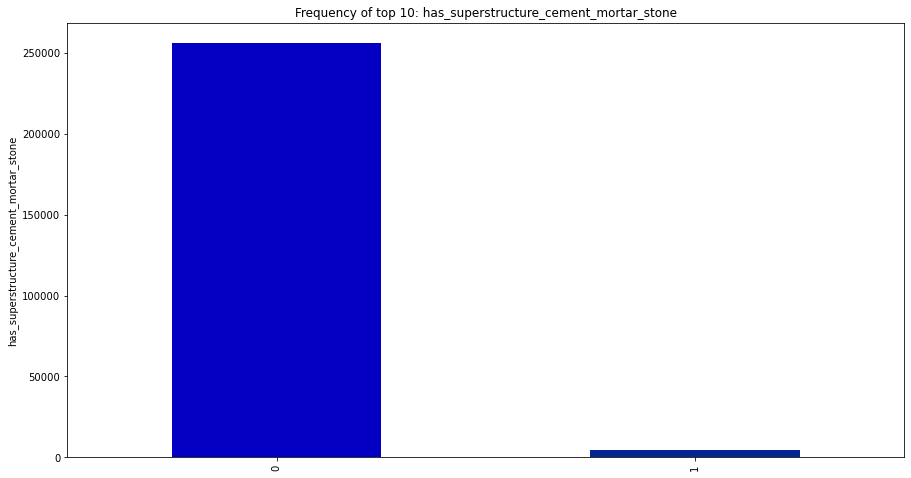

In [41]:
colInfo(combined_df['has_superstructure_cement_mortar_stone'])

**has_superstructure_cement_mortar_stone** looks good.

In [42]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_mud_mortar_brick'].value_counts()

0    242840
1     17761
Name: has_superstructure_mud_mortar_brick, dtype: int64

In [43]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_mud_mortar_brick'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"242,840",93.18 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.07,-
Median,0.00,-


,Value Count,% Value Count
0,242840,93.184600
1,17761,6.815400


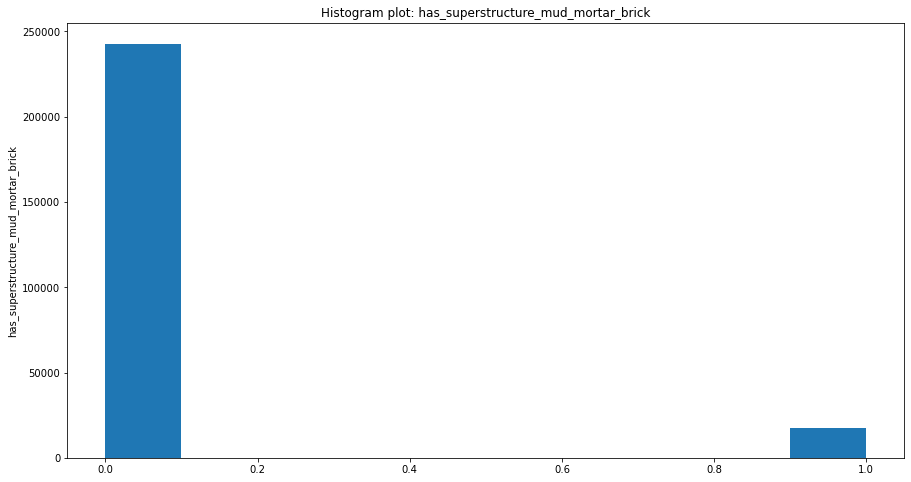

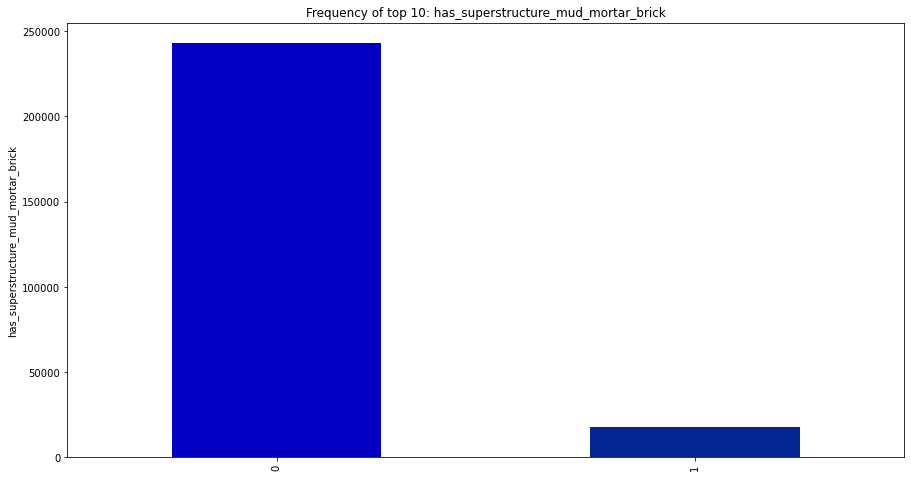

In [44]:
colInfo(combined_df['has_superstructure_mud_mortar_brick'])

**has_superstructure_mud_mortar_brick** looks good.

In [45]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_cement_mortar_brick'].value_counts()

0    240986
1     19615
Name: has_superstructure_cement_mortar_brick, dtype: int64

In [46]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_cement_mortar_brick'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"240,986",92.47 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.08,-
Median,0.00,-


,Value Count,% Value Count
0,240986,92.473168
1,19615,7.526832


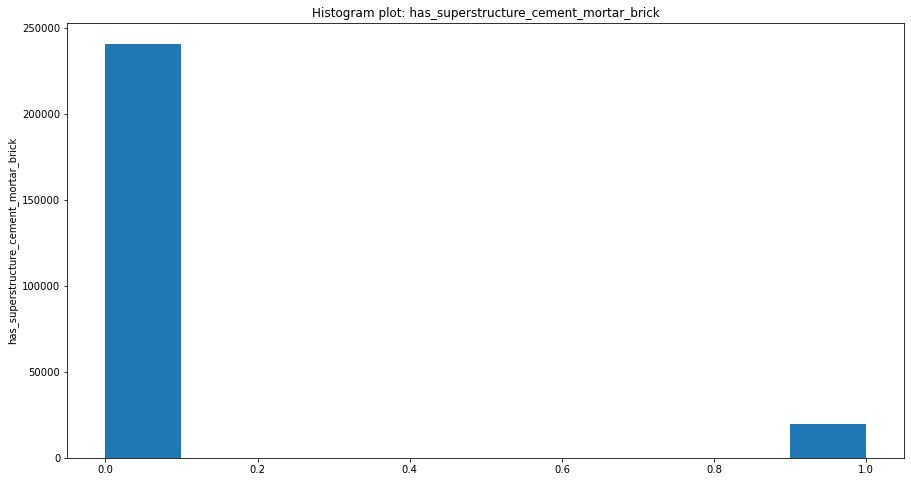

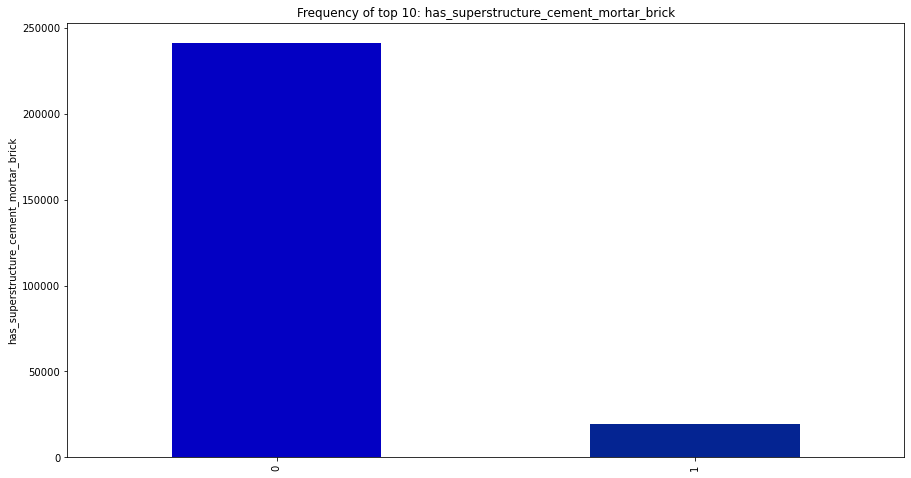

In [47]:
colInfo(combined_df['has_superstructure_cement_mortar_brick'])

**has_superstructure_cement_mortar_brick** looks good.

In [48]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_timber'].value_counts()

0    194151
1     66450
Name: has_superstructure_timber, dtype: int64

In [49]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_timber'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"194,151",74.50 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.25,-
Median,0.00,-


,Value Count,% Value Count
0,194151,74.501249
1,66450,25.498751


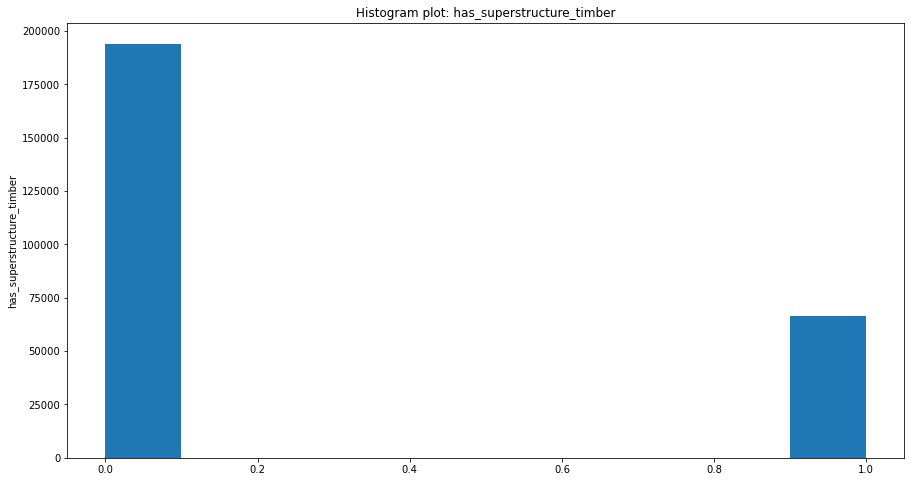

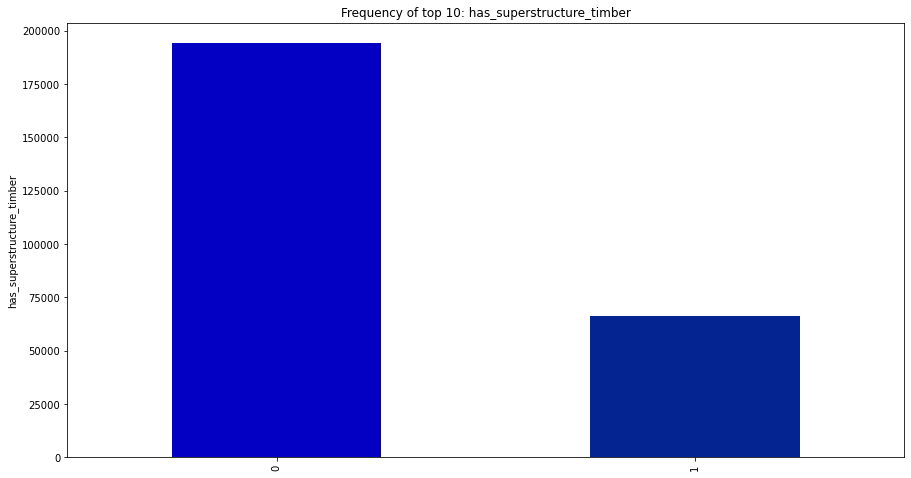

In [50]:
colInfo(combined_df['has_superstructure_timber'])

**has_superstructure_timber** looks good.

In [51]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_bamboo'].value_counts()

0    238447
1     22154
Name: has_superstructure_bamboo, dtype: int64

In [52]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_bamboo'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"238,447",91.50 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.09,-
Median,0.00,-


,Value Count,% Value Count
0,238447,91.498881
1,22154,8.501119


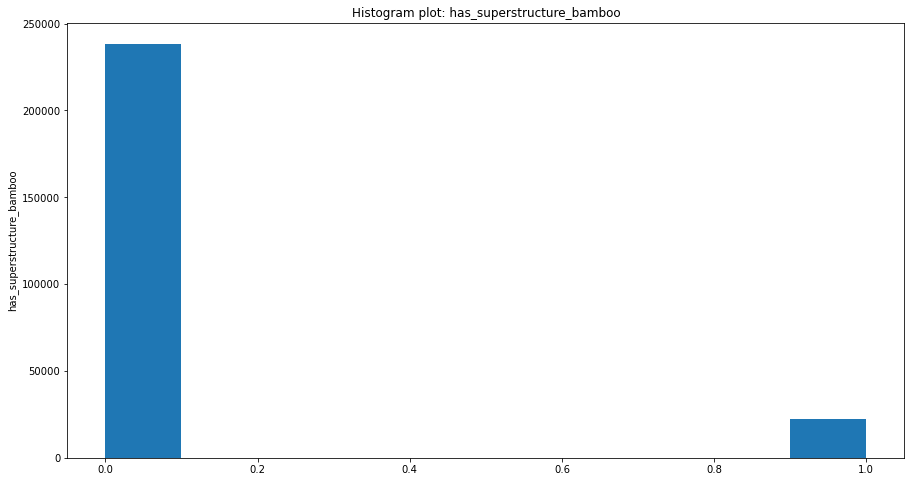

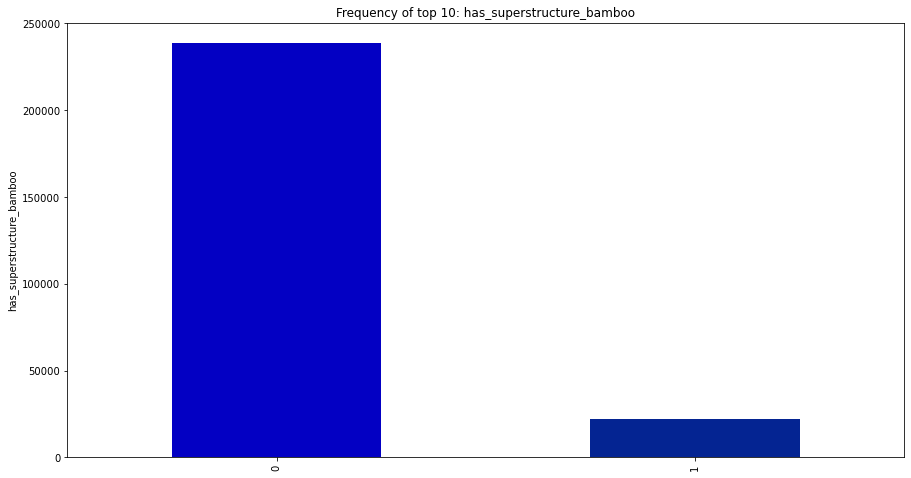

In [53]:
colInfo(combined_df['has_superstructure_bamboo'])

**has_superstructure_bamboo** looks good.

In [54]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_rc_non_engineered'].value_counts()

0    249502
1     11099
Name: has_superstructure_rc_non_engineered, dtype: int64

In [55]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_rc_non_engineered'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"249,502",95.74 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.04,-
Median,0.00,-


,Value Count,% Value Count
0,249502,95.740999
1,11099,4.259001


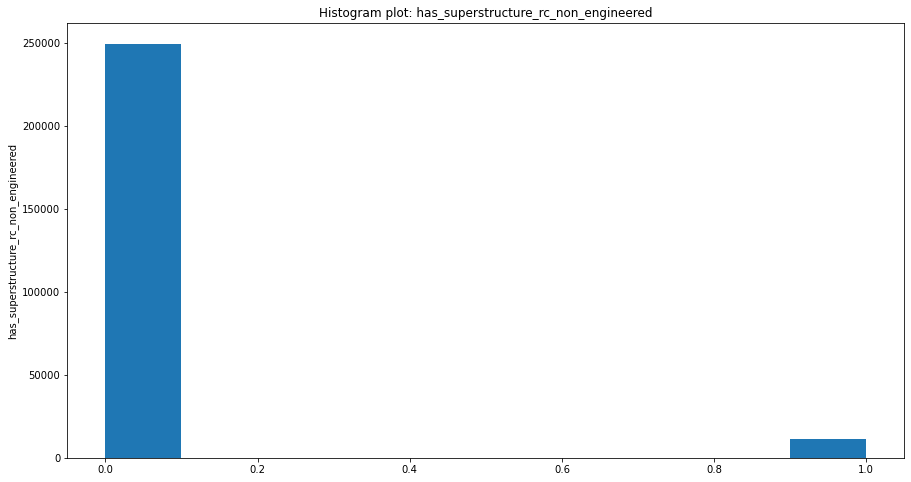

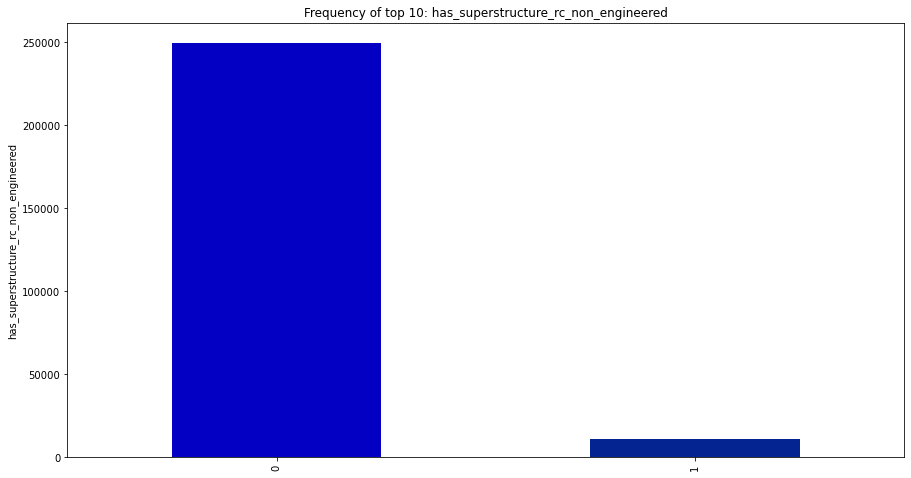

In [56]:
colInfo(combined_df['has_superstructure_rc_non_engineered'])

**has_superstructure_rc_non_engineered** looks good.

In [57]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_rc_engineered'].value_counts()

0    256468
1      4133
Name: has_superstructure_rc_engineered, dtype: int64

In [58]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_rc_engineered'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"256,468",98.41 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.02,-
Median,0.00,-


,Value Count,% Value Count
0,256468,98.414051
1,4133,1.585949


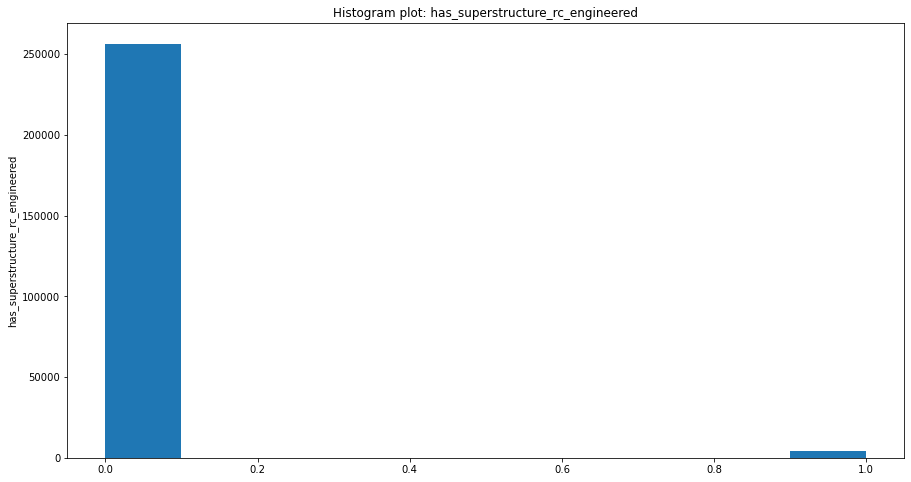

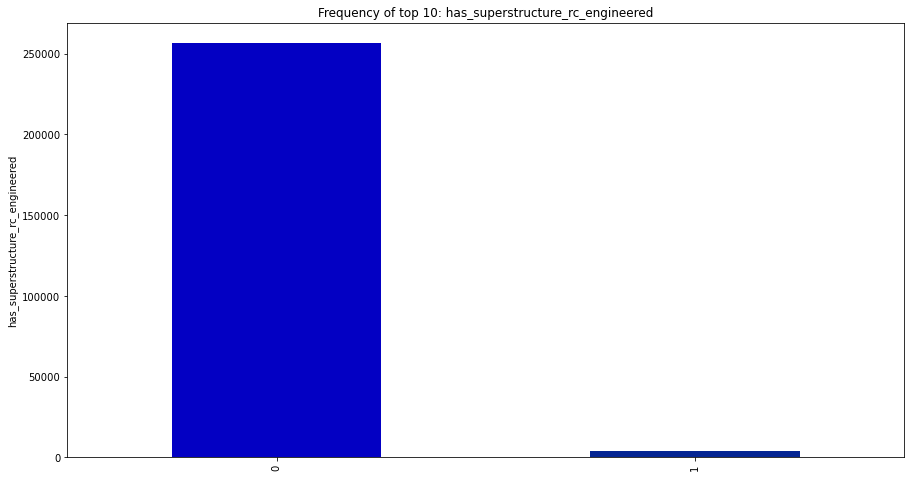

In [59]:
colInfo(combined_df['has_superstructure_rc_engineered'])

**has_superstructure_rc_engineered** looks good.

In [60]:
#Checking to see if I only have 0 and 1.
combined_df['has_superstructure_other'].value_counts()

0    256696
1      3905
Name: has_superstructure_other, dtype: int64

In [61]:
#I need to check to see if I have 260,601.
combined_df['has_superstructure_other'].value_counts().sum()

260601

,Number,Percentage
,,
Zeroes,"256,696",98.50 %
Missing,0,0.00 %
Unknown,0,0.00 %
Uniques,2,0.00 %
Mean,0.01,-
Median,0.00,-


,Value Count,% Value Count
0,256696,98.501541
1,3905,1.498459


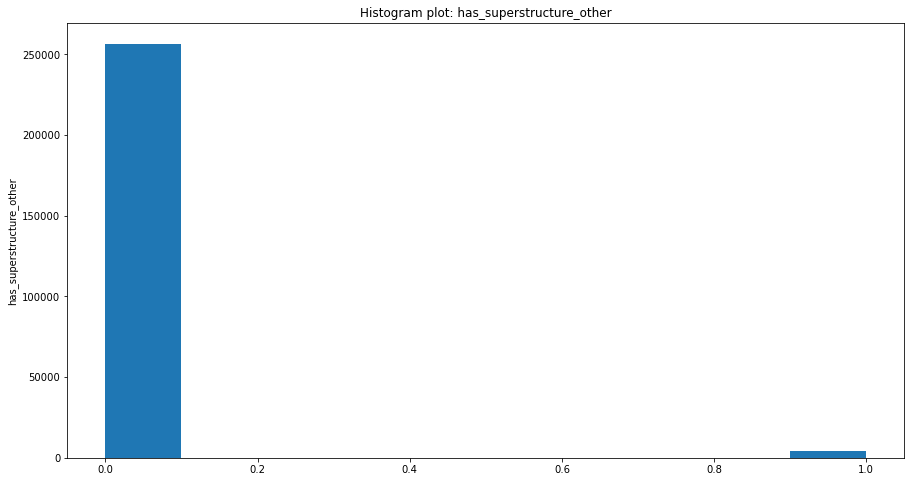

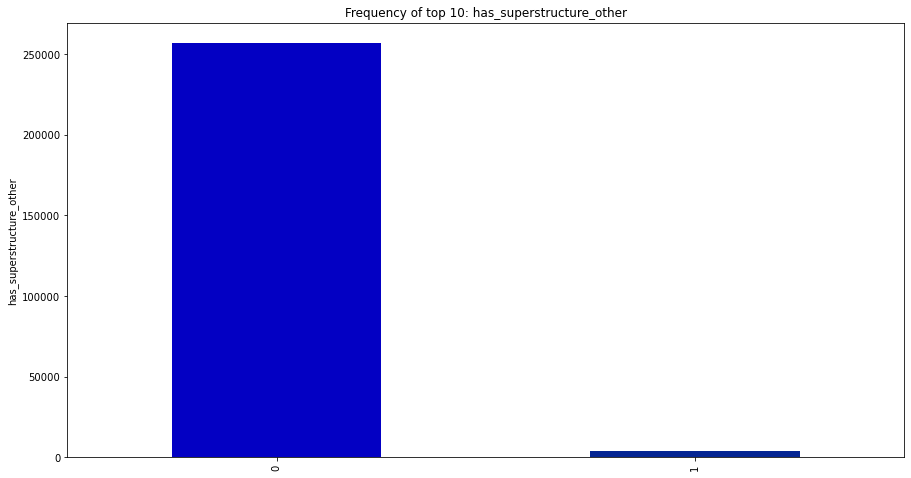

In [62]:
colInfo(combined_df['has_superstructure_other'])

**has_superstructure_other** looks good.

Great! our features are all 1 and 0 and there are no missing values. Everything looks good for my columns and I for sure know I am working with all **categorical data**. 

### **Features**

With our final dataset, let's do a run through on what the columns (features) we are working with. 

    
- **land_surface_condition**
    - surface condition of the land where the building was built. Possible values: n, o, t.
    
- **foundation_type**
    -  type of foundation used while building. Possible values: h, i, r, u, w. 

- **roof_type**
    - type of roof used while building. Possible values: n, q, x.

- **ground_floor_type**
    - type of the ground floor. Possible values: f, m, v, x, z.

- **has_superstructure_adobe_mud**
    - Indicates if the superstructure was made of Adobe/Mud.

- **has_superstructure_mud_mortar_stone**
    - Indicates if the superstructure was made of Mud Mortar - Stone.

- **has_superstructure_stone_flag**
    - Indicates if the superstructure was made of Stone.
    
- **has_superstructure_cement_mortar_stone**
    - Indicates if the superstructure was made of Cement Mortar - Stone.

- **has_superstructure_mud_mortar_brick**
    - Indicates if the superstructure was made of Mud Mortar - Brick.

- **has_superstructure_cement_mortar_brick**
    - Indicates if the superstructure was made of Cement Mortar - Brick.

- **has_superstructure_timber**
    - Indicates if the superstructure was made of Timber.

- **has_superstructure_bamboo**
    - Indicates if the superstructure was made of Bamboo.
    
- **has_superstructure_rc_non_engineered**
    - Indicates if the superstructure was made of non-engineered reinforced concrete.

- **has_superstructure_rc_engineered**
    -  Indicates if the superstructure was made of engineered reinforced concrete.

- **has_superstructure_other**
    - Indicates if the superstructure was made of any other material.

- **damage_grade (Target)**
    - Represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:
        - **1** represents low damage.
        - **2** represents medium damage.
        - **3** represents almost complete destruction.

## Finding the link with the data

We dropped and kept everything we wanted to keep. With the completed dataframe, I want to know what features were specific for each target value.

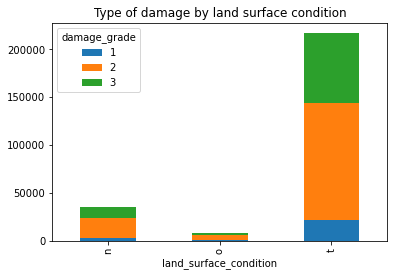

In [63]:
land_surface_condition=combined_df.groupby(['land_surface_condition','damage_grade']).size().reset_index()
b=land_surface_condition.pivot(index='land_surface_condition',columns='damage_grade',values=0).reset_index()
b.set_index('land_surface_condition',inplace=True)
b.plot(kind='bar',stacked=True,title='Type of damage by land surface condition');

In [64]:
combined_df['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

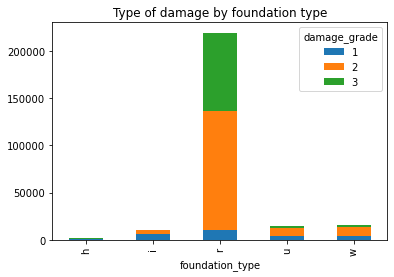

In [65]:
foundation_type=combined_df.groupby(['foundation_type','damage_grade']).size().reset_index()
b=foundation_type.pivot(index='foundation_type',columns='damage_grade',values=0).reset_index()
b.set_index('foundation_type',inplace=True)
b.plot(kind='bar',stacked=True,title='Type of damage by foundation type');

In [66]:
combined_df['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

### Plot Overview

These plots make no sense whatsoever, but I kept them in to show the mistake I made.

### **Note**

One thing you should notice is that my target column **damage_grade** is only listed as values of 1, 2, or 3. I am going to move on and make a **Classification Model** for my studies as my targets are discrete intervals. This is the reason why I will be moving on and using specific approaches with my modeling.  

I am finished with my data cleaning and ready to move onto the next step!

# Pre-Processing 

Since my data is cleaned up, let me look at the types of my data and see what I am working with.

In [67]:
#Checking types of data we are working with.
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   land_surface_condition                  260601 non-null  object
 2   foundation_type                         260601 non-null  object
 3   roof_type                               260601 non-null  object
 4   ground_floor_type                       260601 non-null  object
 5   has_superstructure_adobe_mud            260601 non-null  int64 
 6   has_superstructure_mud_mortar_stone     260601 non-null  int64 
 7   has_superstructure_stone_flag           260601 non-null  int64 
 8   has_superstructure_cement_mortar_stone  260601 non-null  int64 
 9   has_superstructure_mud_mortar_brick     260601 non-null  int64 
 10  has_superstructure_cement_mortar_brick  260601 non-null 

In [68]:
#Pulling up our dataframe just for sanity check
combined_df

,geo_level_1_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,6,t,r,n,f,1,1,0,0,0,0,0,0,0,0,0,3
1,8,o,r,n,x,0,1,0,0,0,0,0,0,0,0,0,2
2,21,t,r,n,f,0,1,0,0,0,0,0,0,0,0,0,3
3,22,t,r,n,f,0,1,0,0,0,0,1,1,0,0,0,2
4,11,t,r,n,f,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,n,r,n,f,0,1,0,0,0,0,0,0,0,0,0,2
260597,17,t,r,n,f,0,1,0,0,0,0,0,0,0,0,0,3
260598,17,t,r,q,f,0,1,0,0,0,0,0,0,0,0,0,3
260599,26,t,r,x,v,0,0,0,0,0,1,0,0,0,0,0,2


It looks like I am working with all categorical data because my other columns are all 1 & 0's. That means I will not be working with any numerical data. 

### Train-Test Split

Before I do my train-test split, I need to create my **X** and **y** variables.

In [69]:
#Creating our X
X = combined_df.drop('damage_grade', axis=1)
#Creating our Target
y = combined_df['damage_grade']

In [70]:
#Doing our train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Great, we made a Train-Test split and now we can start making our pipeline.

We are first going to create functions that will grab the object labeled columns in our dataframe because I will need to **One Hot Encode** some of my columns. 

In [71]:
#Grabs all of my columns.
def grab_all_columns(df): 
    return df.select_dtypes(include=['object', 'float', 'int'])

In [72]:
#Converting funtions intro transformer (Object Values)
grab_everything = FunctionTransformer(grab_all_columns)

Awesome, we made a function transformer for our certain columns. Let's see how our target values are divided up.

In [73]:
#Let's check to see if there are any class imbalances 
y_train.value_counts(normalize= True)

2    0.569276
3    0.334653
1    0.096071
Name: damage_grade, dtype: float64

There is slight class imbalance but I will not use SMOTE for the time being. I will move forward and build my models and see what the values I recieve are and if needed, I will come back and use SMOTE on my data. 

### **Pipelines**

We are now going to start building the pipelines.

Like I mentioned earlier, we are only working with categorical data, so as of now I will only need to **One Hot Encode** certain columns that I have. 

In [74]:
#These are the columns that I will need to One Hot Encode in my pipeline.
categorical_columns = ['geo_level_1_id','land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type']

#Our categorical pipeline 
categorical_pipeline = Pipeline(steps=[('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])


In [75]:
#We are now building our column transformers.
ct = ColumnTransformer(transformers = [('subpipe_cat', categorical_pipeline, categorical_columns)
], remainder='passthrough')

# Modeling

### **Dummy Model**

Great, we now have a pipeline and so let's go ahead and build our dummy model. We are now going to build a column transformer just for our dummy and our first simple model. Since we are working with only categorical data, I will be using the same ColumnTransformer for all of my models.

In [76]:
#I am building my pipeline for my dummy and my 1st simple model.
dummy_simple = Pipeline(steps=[
    ('ct', ct),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_train, y_train)

,Scores
,
F1 Macro,0.2418
F1 Micro,0.5693


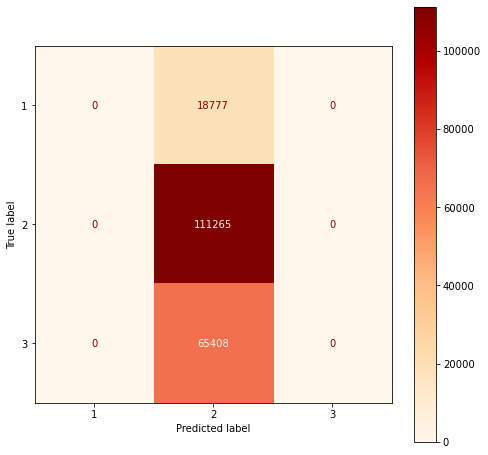

In [77]:
#Running my function to get all of my scores and getting a confusion matrix.
modelReport(dummy_simple,X_train,y_train)

Our dummy gives us an F1 Score of **56.93%**. This is the baseline. My model just has to do better than this score.

### First Simple Model (Logistic Regression)

We are going to be building a **Logistic Regression** for our first model.

,Scores
,
F1 Macro,0.5768
F1 Micro,0.6646


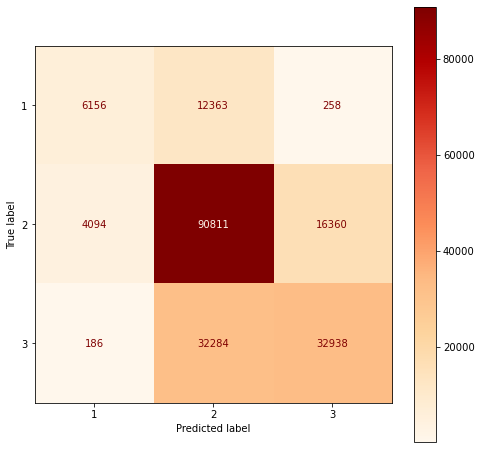

In [78]:
logistic_regression_pipeline = Pipeline([
    ('ct', ct),
    ('log_reg', LogisticRegression(random_state=42, n_jobs=-4))
])
logistic_regression_pipeline.fit(X_train, y_train)
modelReport(logistic_regression_pipeline,X_train,y_train)

We got a score of **66%** for our F1 Score. It's okay, but let me run other models and see if I can get any higher scores or not.

### Random Forest

Since I am working with classification data, I will be using a random forest model to see what my F1 Score will be.

,Scores
,
F1 Macro,0.6098
F1 Micro,0.6770


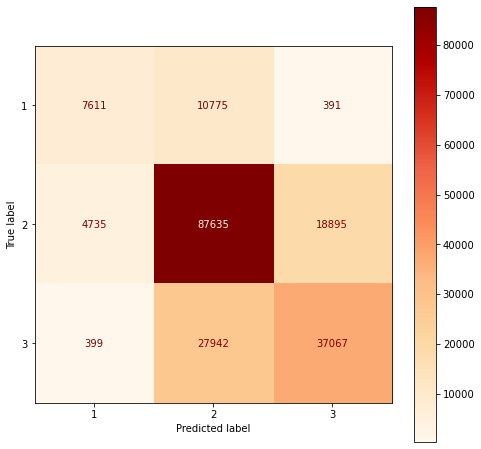

In [79]:
random_forest_pipeline = Pipeline([
    ('ct',ct),
   ('rfc',RandomForestClassifier(random_state=42,n_jobs= -2))
])

random_forest_pipeline.fit(X_train,y_train)
modelReport(random_forest_pipeline,X_train,y_train)


An improvement is an improvement, but my random forest model did only 1% better than my logistic regression.

I am not happy with this score. Let's run another model and see what my score is.

### XG Boosting 

In [78]:
XGBRF_model_pipe = Pipeline([
    ('ct',ct),
   ('xg',xgboost.XGBRFClassifier(random_state=42,n_jobs=-2))
])

,Scores
,
F1 Macro,0.5322
F1 Micro,0.6604


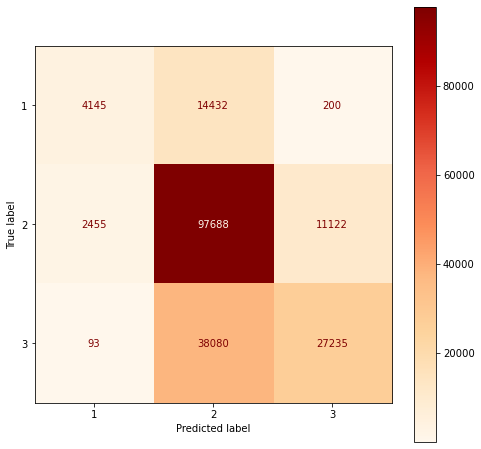

In [79]:
XGBRF_model_pipe.fit(X_train,y_train)
modelReport(XGBRF_model_pipe,X_train,y_train)

I got a score of 66% for my **XGBoost**, I honestly do not like this score and will try to move on to another model and see what happens.

### K-Nearest Neighbors

In [80]:
knn_model_pipe = Pipeline([
    ('ct',ct),
   ('knn',KNeighborsClassifier(n_jobs=-1))
])

knn_model_pipe.fit(X_train,y_train)
modelReport(knn_model_pipe,X_train,y_train)

KeyboardInterrupt: 

Okay, **K-Nearest Neighbors** scores are awful too.

Okay, I do not like the baseline scores for any of my models. I will try to gridsearch my **random forest** because this was my best score.

In [ ]:
params = {}
params['rfc__criterion'] = ['gini','entropy']
params['rfc__n_estimators'] = [100, 125, 150]
params['rfc__max_depth'] = [ 20, 25, 30]



random_forest_grid_search = GridSearchCV(estimator=random_forest_pipeline,
                           param_grid=params,
                           cv=5,
                           n_jobs=-2,
                           scoring=[ 'f1_macro', 'f1_micro'],
                           refit='f1_micro',
                           return_train_score=True)

random_forest_grid_search.fit(X_train,y_train)

In [ ]:
prettyPrintGridCVResults(random_forest_grid_search)

Okay, even with gridsearching on our best model, our scores are terrible. I am going to bring back my original dataframe and I will be re-doing my process using more columns. 

# Restarting on our process

### Bringing in our dataframe again

In [80]:
#Re-entering our dataframe again. 
df_2 = pd.read_csv('Data/train_values (2).csv')

In [81]:
#Bringing in our target values and dropping the building_id column because those are unnecessary 
target_2 = pd.read_csv('Data/train_labels (1).csv')
target_2 = target_2.drop(columns='building_id')

In [82]:
#Combining the dataframes again to combine with the target columns.
dataframes = [df_2, target_2]
combined_df_2 = pd.concat(dataframes, axis = 1)
combined_df_2

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


We got our full dataframe back. I am going to be using a heatmap to see the correlation between the categorical features. The following heatmap was discovered by me and a fellow cohort-mate [Xiaohua Su](https://github.com/xiaohua-su).

For this heatmap, I will be dropping the **building_id** column because there are over 260,000 unique Id's and that will take me too long to process. It's also not important in the overall picture of my prediction.

In [83]:
combined_df_2 = combined_df_2.drop(columns=['building_id'])
combined_df_2

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [84]:
#Gathering our categorical data because that is what we will be using for this project.
data_types_2 = {'geo_level_1_id': 'categorical',
              'geo_level_2_id': 'categorical',
              'geo_level_3_id': 'categorical',
              'land_surface_condition' : 'categorical',
             'foundation_type':'categorical',
             'geo_level_2_id':'categorical',
             'geo_level_3_id':'categorical',
             'roof_type':'categorical',
             'ground_floor_type':'categorical',
             'other_floor_type':'categorical',
             'position':'categorical',
             'plan_configuration':'categorical',
             'has_superstructure_adobe_mud':'categorical',
             'has_superstructure_mud_mortar_stone':'categorical',
             'has_superstructure_stone_flag':'categorical',
             'has_superstructure_cement_mortar_stone':'categorical',
             'has_superstructure_mud_mortar_brick':'categorical',
             'has_superstructure_cement_mortar_brick':'categorical',
             'has_superstructure_timber':'categorical',
             'has_superstructure_bamboo':'categorical',
             'has_superstructure_rc_non_engineered':'categorical',
             'has_superstructure_rc_engineered':'categorical',
             'has_superstructure_other':'categorical',
             'legal_ownership_status':'categorical',
             'has_secondary_use':'categorical',
             'has_secondary_use_agriculture':'categorical',
             'has_secondary_use_hotel':'categorical',
              'has_secondary_use_rental':'categorical', 
              'has_secondary_use_institution':'categorical',
              'has_secondary_use_school':'categorical',
              'has_secondary_use_industry':'categorical',
              'has_secondary_use_health_post':'categorical',
              'has_secondary_use_gov_office':'categorical',
            'has_secondary_use_use_police':'categorical',
            'has_secondary_use_other':'categorical',
              'damage_grade':'categorical'

             
             
             }

interval_cols_2 = [col for col, v in data_types_2.items() if v=='interval' and col in data.columns]
interval_cols_2

[]

In [85]:
phik_overview_2 = combined_df_2.phik_matrix(interval_cols = interval_cols_2)
phik_overview_2.round(2)

/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable geo_level_2_id is large: 1414. Are you sure this is not an interval variable? Analysis for pairs of variables including geo_level_2_id can be slow.
  warnings.warn(
/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable geo_level_3_id is large: 11595. Are you sure this is not an interval variable? Analysis for pairs of variables including geo_level_3_id can be slow.
  warnings.warn(


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
geo_level_1_id,1.00,1.00,1.00,0.49,0.33,0.28,0.39,0.17,0.57,0.46,0.33,0.38,0.43,0.12,0.56,0.60,0.25,0.11,0.59,0.38,0.37,0.44,0.10,0.11,0.15,0.28,0.19,0.15,0.18,0.06,0.06,0.01,0.02,0.02,0.00,0.01,0.00,0.09,0.60
geo_level_2_id,1.00,1.00,1.00,0.72,0.64,0.62,0.78,0.72,0.81,0.77,0.77,0.74,0.66,0.40,0.78,0.86,0.81,0.31,0.77,0.63,0.80,0.81,0.55,0.38,0.58,0.77,0.26,0.46,0.55,0.25,0.22,0.03,0.00,0.00,0.06,0.02,0.00,0.62,0.76
geo_level_3_id,1.00,1.00,1.00,0.78,0.84,0.61,0.88,0.90,0.88,0.83,0.88,0.85,0.76,0.55,0.92,0.92,0.96,0.49,0.87,0.69,0.96,0.94,0.75,0.51,0.84,0.90,0.00,0.67,0.76,0.42,0.33,0.00,0.00,0.00,0.11,0.00,0.00,0.80,0.82
count_floors_pre_eq,0.49,0.72,0.78,1.00,0.41,0.74,0.93,0.11,0.25,0.38,0.21,0.74,0.46,0.08,0.20,0.36,0.05,0.03,0.39,0.26,0.10,0.08,0.11,0.13,0.03,0.10,0.09,0.07,0.05,0.14,0.07,0.03,0.02,0.02,0.01,0.01,0.00,0.01,0.33
age,0.33,0.64,0.84,0.41,1.00,0.13,0.27,0.07,0.32,0.28,0.27,0.31,0.38,0.07,0.27,0.28,0.04,0.06,0.37,0.24,0.06,0.07,0.15,0.17,0.04,0.13,0.08,0.05,0.03,0.09,0.05,0.02,0.01,0.01,0.00,0.00,0.00,0.01,0.37
area_percentage,0.28,0.62,0.61,0.74,0.13,1.00,0.64,0.07,0.40,0.52,0.39,0.45,0.13,0.22,0.07,0.34,0.04,0.11,0.10,0.30,0.08,0.05,0.27,0.32,0.03,0.06,0.29,0.17,0.03,0.22,0.16,0.12,0.23,0.03,0.06,0.07,0.00,0.04,0.26
height_percentage,0.39,0.78,0.88,0.93,0.27,0.64,1.00,0.09,0.40,0.51,0.35,0.78,0.42,0.09,0.22,0.42,0.05,0.06,0.34,0.34,0.10,0.08,0.24,0.29,0.04,0.12,0.11,0.15,0.08,0.24,0.13,0.07,0.07,0.03,0.02,0.03,0.00,0.04,0.31
land_surface_condition,0.17,0.72,0.90,0.11,0.07,0.07,0.09,1.00,0.04,0.13,0.06,0.04,0.04,0.04,0.01,0.05,0.03,0.01,0.04,0.04,0.03,0.02,0.01,0.02,0.02,0.02,0.02,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.10
foundation_type,0.57,0.81,0.88,0.25,0.32,0.40,0.40,0.04,1.00,0.60,0.73,0.48,0.12,0.14,0.09,0.45,0.12,0.17,0.06,0.42,0.28,0.25,0.42,0.45,0.09,0.18,0.13,0.14,0.04,0.21,0.15,0.06,0.03,0.02,0.02,0.02,0.01,0.01,0.37
roof_type,0.46,0.77,0.83,0.38,0.28,0.52,0.51,0.13,0.60,1.00,0.53,0.52,0.13,0.11,0.04,0.27,0.03,0.05,0.02,0.26,0.09,0.06,0.27,0.29,0.01,0.03,0.13,0.10,0.04,0.14,0.11,0.04,0.02,0.01,0.01,0.01,0.00,0.01,0.56


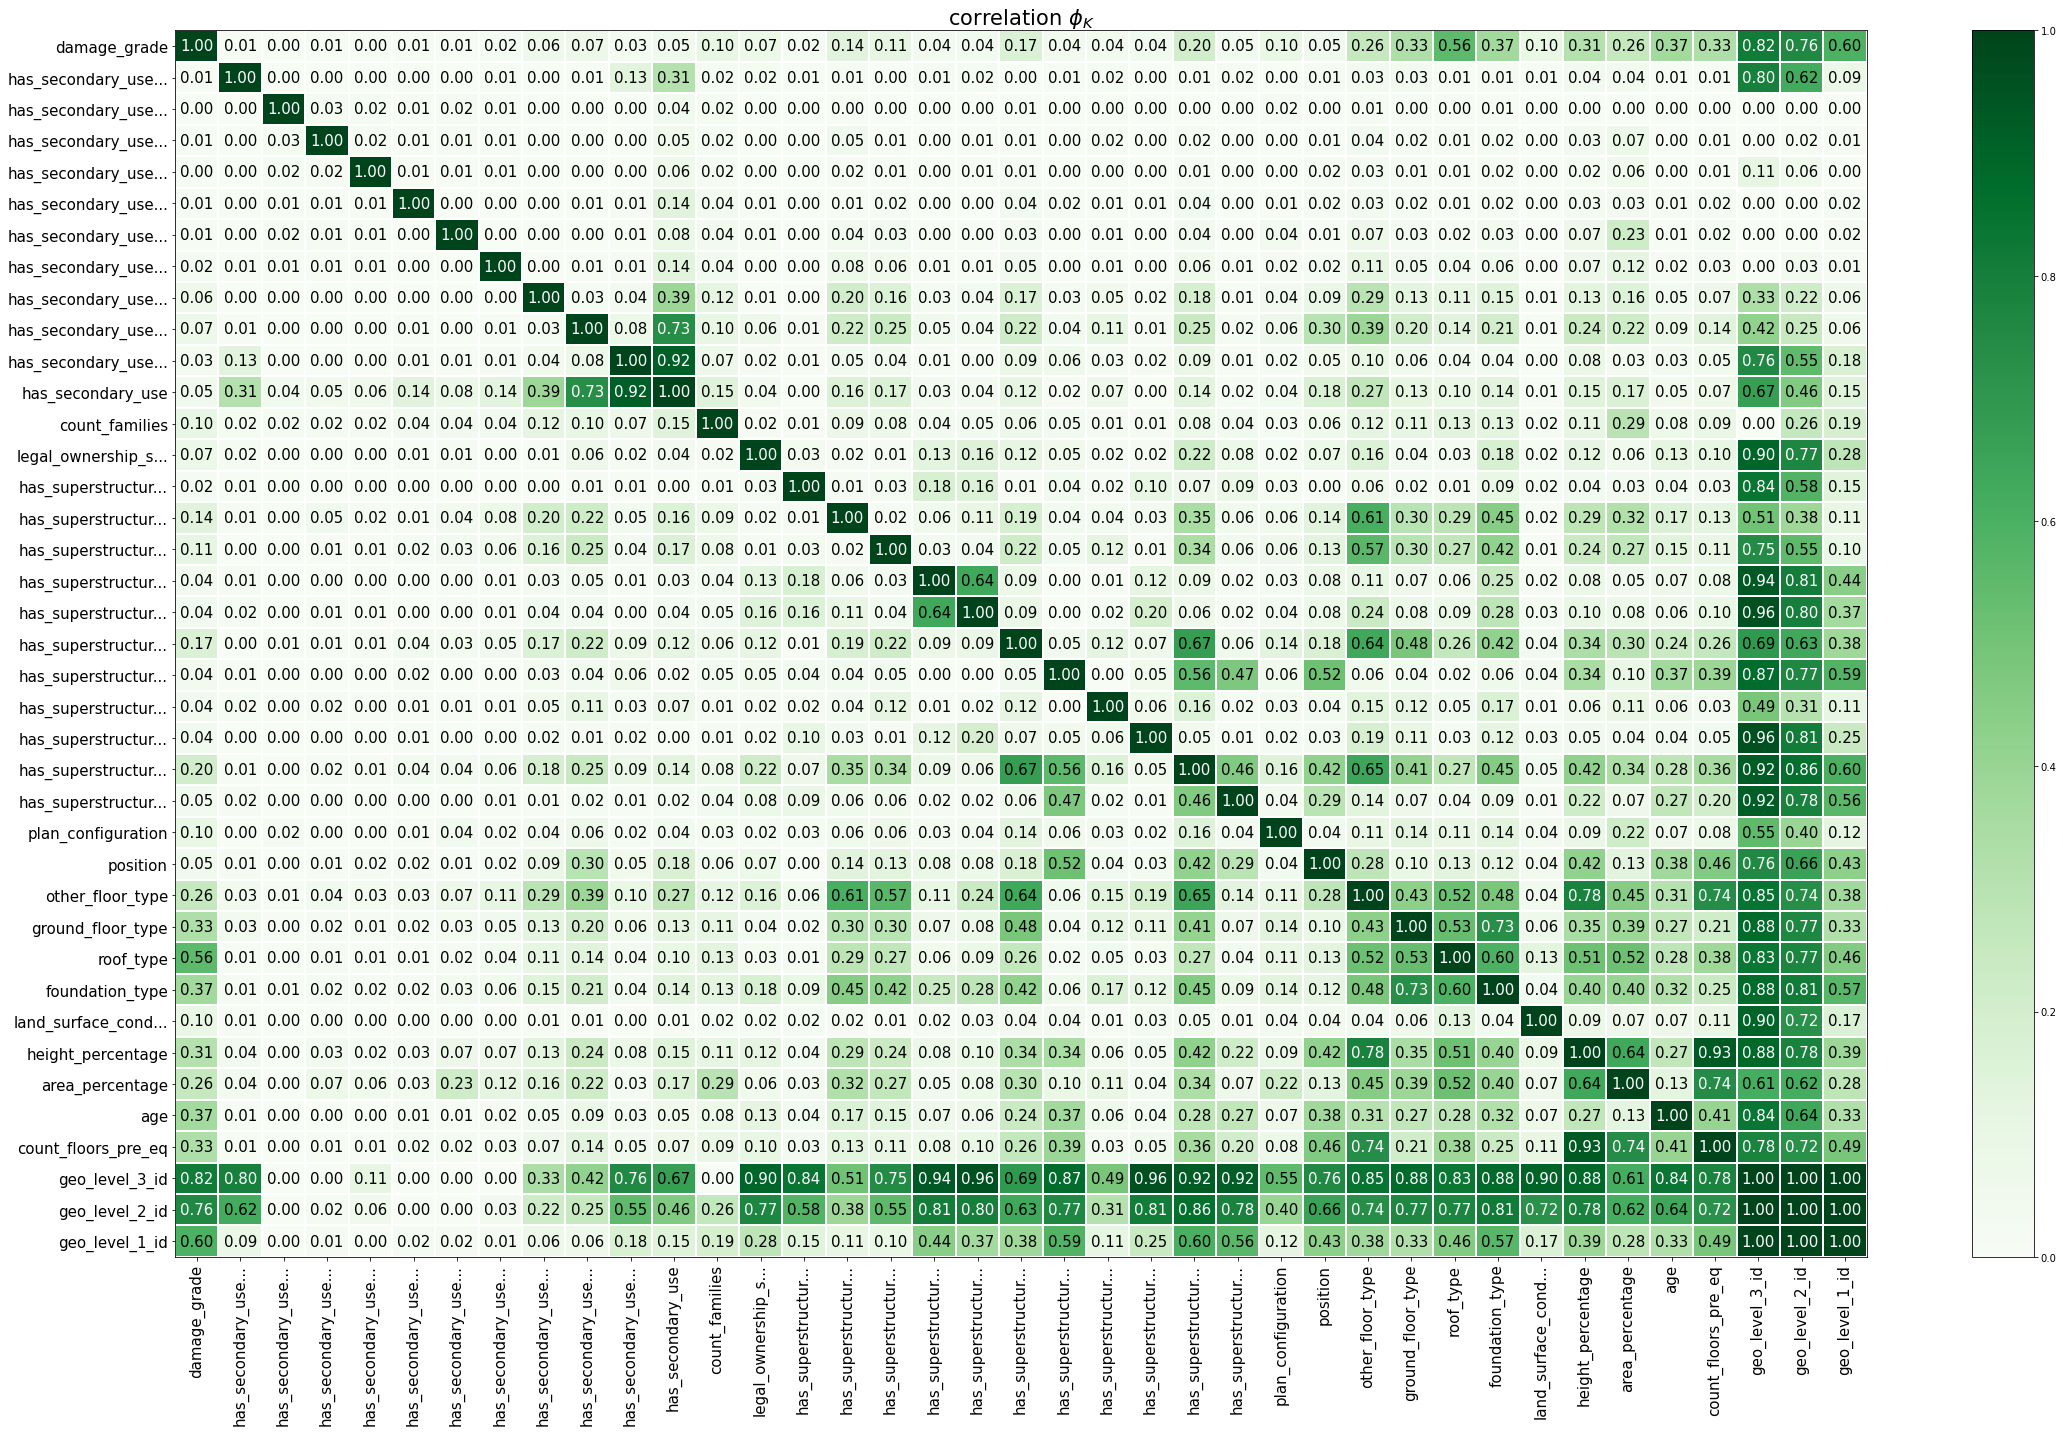

In [86]:
#Pulling up our heatmap!
plot_correlation_matrix(phik_overview_2.values, 
                        x_labels=phik_overview_2.columns, 
                        y_labels=phik_overview_2.index, 
                        vmin=0, vmax=1, color_map='Greens', 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(32, 20))
plt.tight_layout()

My rule of thumb for multi-collinearity is .80 or above. If we look at this heatmap above, **geo_level_3_id** is above that threshold so I will be dropping this column. **geo_level_2_id** is just under so I will be adding this feature to our dataframe.

Let's start dropping our columns again.

In [87]:
#Dropping all of the secondary usage columns.
combined_df_2 = combined_df_2.drop(columns=['has_secondary_use',
                                            'geo_level_3_id', 'count_floors_pre_eq',
                                            'age', 'area_percentage', 
                                            'height_percentage',
                                        'has_secondary_use_agriculture',
                                        'has_secondary_use_hotel', 
                                        'has_secondary_use_rental',
                                       'has_secondary_use_institution', 
                                       'has_secondary_use_school',
                                       'has_secondary_use_industry', 
                                       'has_secondary_use_health_post',
                                       'has_secondary_use_gov_office', 
                                       'has_secondary_use_use_police', 
                                       'has_secondary_use_other', 
                                           'other_floor_type', 'position', 
                                        'plan_configuration','legal_ownership_status', 
                                           'count_families'])
combined_df_2

,geo_level_1_id,geo_level_2_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,6,487,t,r,n,f,1,1,0,0,0,0,0,0,0,0,0,3
1,8,900,o,r,n,x,0,1,0,0,0,0,0,0,0,0,0,2
2,21,363,t,r,n,f,0,1,0,0,0,0,0,0,0,0,0,3
3,22,418,t,r,n,f,0,1,0,0,0,0,1,1,0,0,0,2
4,11,131,t,r,n,f,1,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,n,r,n,f,0,1,0,0,0,0,0,0,0,0,0,2
260597,17,715,t,r,n,f,0,1,0,0,0,0,0,0,0,0,0,3
260598,17,51,t,r,q,f,0,1,0,0,0,0,0,0,0,0,0,3
260599,26,39,t,r,x,v,0,0,0,0,0,1,0,0,0,0,0,2


We dropped all the features we do not need and now we will have to do another train-test split again.

### Train-Test Split part 2

In [88]:
#Creating our X
X_2 = combined_df_2.drop('damage_grade', axis=1)
#Creating our Target
y_2 = combined_df_2['damage_grade']

#Doing our train-test split.
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=42)

### Building our Pipeline part 2

In [89]:
#These are the columns that I will need to One Hot Encode in my pipeline.
categorical_columns_2 = ['geo_level_1_id','geo_level_2_id','land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type']

#Our categorical pipeline 
categorical_pipeline_2 = Pipeline(steps=[('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

#We are now building our column transformers.
ct_2 = ColumnTransformer(transformers = [('subpipe_cat', categorical_pipeline_2, categorical_columns_2)
], remainder='passthrough')

### Running our models pt. 2

,Scores
,
F1 Macro,0.2418
F1 Micro,0.5693


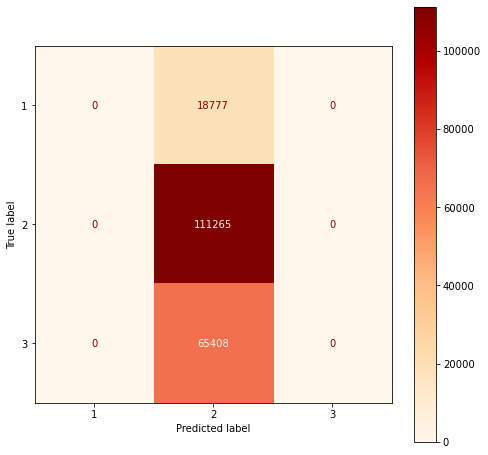

In [90]:
#I am building my pipeline for my dummy and my 1st simple model.
dummy_simple_2 = Pipeline(steps=[
    ('ct', ct_2),
    ('dummy', DummyClassifier(strategy='most_frequent'))
]).fit(X_train_2, y_train_2)

modelReport(dummy_simple_2,X_train_2,y_train_2)

As expected, our second dummy model is about the same score as the first one in the **56%** range. 

### **Random Forest**

Let's go off an build another **Random Forest** again.

,Scores
,
F1 Macro,0.6589
F1 Micro,0.7184


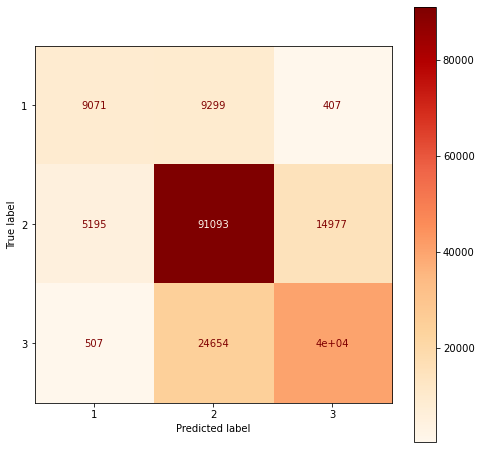

In [91]:
random_forest_pipeline_2 = Pipeline([
    ('ct',ct_2),
   ('rfc',RandomForestClassifier(random_state=42,n_jobs= -2))
])

random_forest_pipeline_2.fit(X_train_2,y_train_2)
modelReport(random_forest_pipeline_2,X_train_2,y_train_2)

Our model performed significantly better! We are now going to run the other tests and see what those results are.

### Logistic Regression 

Let's run my simple model again and see what my scores are with my added features.

,Scores
,
F1 Macro,0.6402
F1 Micro,0.7119


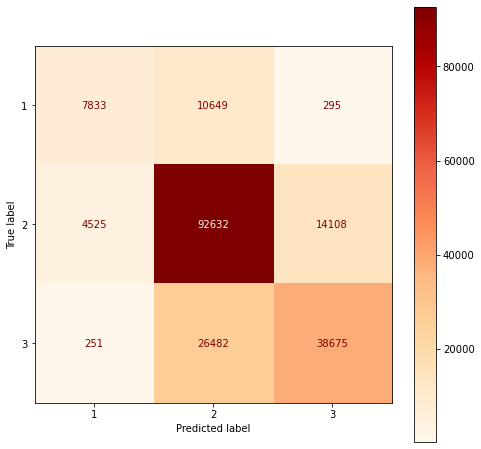

In [98]:
logistic_regression_pipeline_2 = Pipeline([
    ('ct', ct_2),
    ('log_reg', LogisticRegression(random_state=42, n_jobs=-2))
])
logistic_regression_pipeline_2.fit(X_train_2, y_train_2)
modelReport(logistic_regression_pipeline_2,X_train_2,y_train_2)

Our score crossed the 70% line! This is a great start and let's see what our scores are for our other models.

### XG-Boosting 

Let's bring in our **XG-Boosting** model and see what our score is!

In [ ]:
#We are bringing in our pipeline for our model
XGBRF_model_pipe_2 = Pipeline([
    ('ct',ct_2),
   ('xg',xgboost.XGBRFClassifier(random_state=42,n_jobs=-2))
])

In [ ]:
#Fitting our model
XGBRF_model_pipe_2.fit(X_train_2,y_train_2)
#Printing our confusion matrix and our micro and macro score.
modelReport(XGBRF_model_pipe_2,X_train_2,y_train_2)

Our score for our XG Boost is not that great. On to the next model!

In [ ]:
#We are going to save our model.
XG_boost_file_name = 'XG_boost.sav'
pickle.dump(XGBRF_model_pipe_2, open(XG_boost_file_name, 'wb'))
XG_boost_pickle = pickle.load(open('XG_boost.sav', 'rb'))

For our next and final model we are going to use **K-Nearest Neighbors.**

### K-Nearest Neighbors (KNN)

In [ ]:
#Building our pipleline for our model.
knn_model_pipe_2 = Pipeline([
    ('ct',ct_2),
   ('knn',KNeighborsClassifier(n_jobs=-1))
])
#Fitting our model
knn_model_pipe_2.fit(X_train_2,y_train_2)
#Printing our confusion matrix and our micro and macro score.
modelReport(knn_model_pipe_2,X_train_2,y_train_2)

Our **KNN** model score was close to a 70% and that is a win in my book. 

## Gridsearching 

Our best model was our **Random Forest** and we are now going to gridsearch our model to find the best possible f1 score.

In [175]:
#Random Forest Grid Search
params = {}
params['rfc__criterion'] = ['gini','entropy']
params['rfc__n_estimators'] = [100, 125, 150]
params['rfc__max_depth'] = [ 20, 25, 30]


random_forest_grid_search_2 = GridSearchCV(estimator=random_forest_pipeline_2,
                           param_grid=params,
                           cv=5,
                           n_jobs=-2,
                           scoring=['f1_macro', 'f1_micro'],b
                                           
                           refit='f1_micro',
                           return_train_score=True)

random_forest_grid_search_2.fit(X_train_2,y_train_2)

Exception in thread Thread-137:
Traceback (most recent call last):
  File "/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 567, in run
    self.flag_executor_shutting_down()
  File "/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 756, in flag_executor_shutting_down
    self.kill_workers()
  File "/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 766, in kill_workers
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

    recursive_terminate(p)
  File "/Users/kyongminso/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/joblib/externals/loky/backend/utils.py", line 28, in recursi

In [176]:
prettyPrintGridCVResults(random_forest_grid_search_2)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

This gridsearch took over 13 hours and I was not in a situation to wait. This will be part of my next steps as I do not have the time and computational power to make my gridsearch run. I sincerely did not have the time to run the model without killing my computer.

In [182]:
#One Hot Encoding almost 1,500 columns will take a while with over 260,000 rows. 
#No wonder this gridsearch was taking forever. This will be part of my 
#Next Steps and I will try to run a successful grid search next time.
len(combined_df_2['geo_level_2_id'].unique())

1414

### My Final Model 

We got our final model and we will be running **random forest** for our final model. 

In [92]:
#Building our pipeline for our final model.
final_model = Pipeline([
    ('ct',ct_2),
   ('rfc',RandomForestClassifier(random_state=42,n_jobs= -2))
])
#Fitting our final model.
final_model.fit(X_train_2, y_train_2)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['geo_level_1_id',
                                                   'geo_level_2_id',
                                                   'land_surface_condition',
                                                   'foundation_type',
                                                   'roof_type',
                                                   'ground_floor_type'])])),
                ('rfc', RandomForestClassifier(n_jobs=-2, random_state=42))])

In [93]:
#Obtaining our f1-score.
final_f1_score_micro = f1_score(y_test_2, final_model.predict(X_test_2), average='micro')
final_f1_score_micro

0.7191140581111571

In [94]:
#Obtaining our macro score.
final_f1_score_macro = f1_score(y_test_2, final_model.predict(X_test_2), average='macro')
final_f1_score_macro

0.6610688603123976

In [95]:
#Saving our final model 
# final_model_file_name = 'final_model.sav'
# pickle.dump(final_model, open(final_model_file_name, 'wb'))
# final_model_pickle = pickle.load(open('final_model.sav', 'rb'))

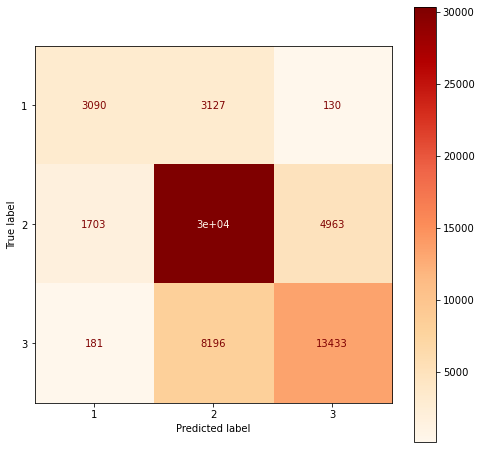

In [96]:
#Building our confusion matrix.
fig, ax = plt.subplots(figsize=(8, 8))

disp = ConfusionMatrixDisplay.from_estimator(
        final_model,
        X_test_2,
        y_test_2,
        display_labels=final_model.classes_,
        cmap='OrRd',
        ax=ax
    )
plt.savefig('Images/final_confusion_matrix.png', bbox_inches='tight');

**Confusion Matrix Summary**

**Row 1**: Looking at this confusion matrix, we can see that the model had some problems predicting our damage grade 1 as it was almost a 50-50 split with damage grade 2. 

**Row 2**: For our damage grade 2, our prediction was fantastic! About 30K was predicted correctly and this row looks good to me!

**Row 3**: This row is pretty solid because majority of our predictions were correctly predicted with damage grade 3.

## Comparsion of our results

We got our scores. Let's see how they compare to others. 

In [136]:
# Preparing the data to plot
models = ['Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'XG-Boost'] 
f1 = [72,71,68,66]

# Creating a DataFrame from a dictionary
df = pd.DataFrame({'Models': models, 'Scores': f1_scores})
print('type: '+str(type(df)), 'size: '+str(np.shape(df)), df, sep='\n')

type: <class 'pandas.core.frame.DataFrame'>
size: (4, 2)
                Models  Scores
0        Random Forest      72
1  Logistic Regression      71
2  K-Nearest Neighbors      68
3             XG-Boost      66


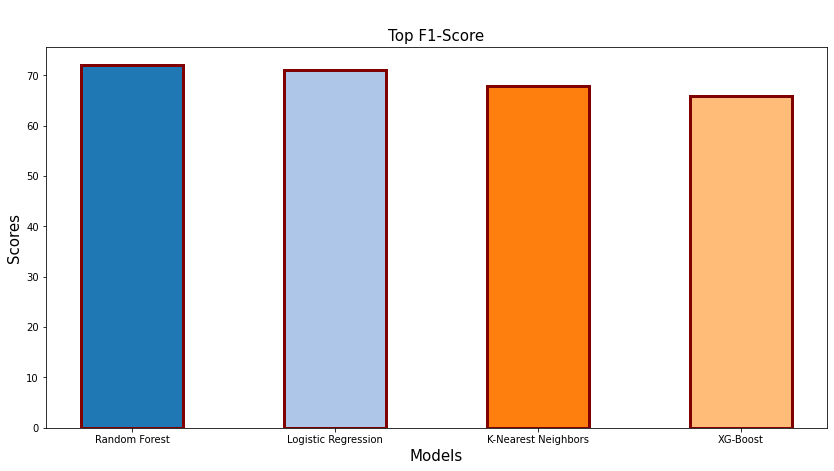

In [142]:
# Visualizing the data in DataFrame df with values on the bars

plt.figure(figsize=[14, 7])
col_map = plt.get_cmap('tab20')

# Creating a bar chart from the DataFrame df
pl = plt.bar(df.Models, df.Scores, width=0.5, color=col_map.colors, 
        edgecolor='maroon', linewidth=3)

for bar in pl:
    plt.annotate(xy=(bar.get_x()+0.09, bar.get_height()+10), text = 'f1',
                     fontsize=10)
    

plt.title('Top F1-Score', fontsize=15)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Scores', fontsize=15)

plt.savefig('Images/f1_bar_chart.png', bbox_inches='tight')
plt.show()

This plot will be used for presentations purposes.

### Feature Importance 

My business problem needs my feature importance, so I need to be able to pull these out.

In [113]:
#We are grabbing the One Hot Encoded columns
ohe_col_names = final_model.named_steps['ct'].named_transformers_['subpipe_cat']['ohe'].get_feature_names_out()
ohe_col_names = list(ohe_col_names)
ohe_col_names

['geo_level_1_id_0',
 'geo_level_1_id_1',
 'geo_level_1_id_2',
 'geo_level_1_id_3',
 'geo_level_1_id_4',
 'geo_level_1_id_5',
 'geo_level_1_id_6',
 'geo_level_1_id_7',
 'geo_level_1_id_8',
 'geo_level_1_id_9',
 'geo_level_1_id_10',
 'geo_level_1_id_11',
 'geo_level_1_id_12',
 'geo_level_1_id_13',
 'geo_level_1_id_14',
 'geo_level_1_id_15',
 'geo_level_1_id_16',
 'geo_level_1_id_17',
 'geo_level_1_id_18',
 'geo_level_1_id_19',
 'geo_level_1_id_20',
 'geo_level_1_id_21',
 'geo_level_1_id_22',
 'geo_level_1_id_23',
 'geo_level_1_id_24',
 'geo_level_1_id_25',
 'geo_level_1_id_26',
 'geo_level_1_id_27',
 'geo_level_1_id_28',
 'geo_level_1_id_29',
 'geo_level_1_id_30',
 'geo_level_2_id_0',
 'geo_level_2_id_1',
 'geo_level_2_id_3',
 'geo_level_2_id_4',
 'geo_level_2_id_5',
 'geo_level_2_id_7',
 'geo_level_2_id_8',
 'geo_level_2_id_9',
 'geo_level_2_id_10',
 'geo_level_2_id_11',
 'geo_level_2_id_12',
 'geo_level_2_id_13',
 'geo_level_2_id_14',
 'geo_level_2_id_15',
 'geo_level_2_id_16',
 'geo_

In [114]:
#Pulling out my columns that I have not one hot encoded and turning it into a list.
list_df_2 = list(combined_df_2.columns)
not_ohe_columns = list_df_2[6:-1]
not_ohe_columns

['has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other']

In [115]:
#Combining both of my lists to make one list. 
final_col = ohe_col_names + not_ohe_columns
final_col

['geo_level_1_id_0',
 'geo_level_1_id_1',
 'geo_level_1_id_2',
 'geo_level_1_id_3',
 'geo_level_1_id_4',
 'geo_level_1_id_5',
 'geo_level_1_id_6',
 'geo_level_1_id_7',
 'geo_level_1_id_8',
 'geo_level_1_id_9',
 'geo_level_1_id_10',
 'geo_level_1_id_11',
 'geo_level_1_id_12',
 'geo_level_1_id_13',
 'geo_level_1_id_14',
 'geo_level_1_id_15',
 'geo_level_1_id_16',
 'geo_level_1_id_17',
 'geo_level_1_id_18',
 'geo_level_1_id_19',
 'geo_level_1_id_20',
 'geo_level_1_id_21',
 'geo_level_1_id_22',
 'geo_level_1_id_23',
 'geo_level_1_id_24',
 'geo_level_1_id_25',
 'geo_level_1_id_26',
 'geo_level_1_id_27',
 'geo_level_1_id_28',
 'geo_level_1_id_29',
 'geo_level_1_id_30',
 'geo_level_2_id_0',
 'geo_level_2_id_1',
 'geo_level_2_id_3',
 'geo_level_2_id_4',
 'geo_level_2_id_5',
 'geo_level_2_id_7',
 'geo_level_2_id_8',
 'geo_level_2_id_9',
 'geo_level_2_id_10',
 'geo_level_2_id_11',
 'geo_level_2_id_12',
 'geo_level_2_id_13',
 'geo_level_2_id_14',
 'geo_level_2_id_15',
 'geo_level_2_id_16',
 'geo_

In [116]:
#We are now creating a new dataframe with our one hot encoded features and features that were not one hot encoded.
new_df = pd.DataFrame(final_model.named_steps['ct'].fit_transform(X_train_2, y_train_2), columns=final_col)
new_df

,geo_level_1_id_0,geo_level_1_id_1,geo_level_1_id_2,geo_level_1_id_3,geo_level_1_id_4,geo_level_1_id_5,geo_level_1_id_6,geo_level_1_id_7,geo_level_1_id_8,geo_level_1_id_9,geo_level_1_id_10,geo_level_1_id_11,geo_level_1_id_12,geo_level_1_id_13,geo_level_1_id_14,geo_level_1_id_15,geo_level_1_id_16,geo_level_1_id_17,geo_level_1_id_18,geo_level_1_id_19,geo_level_1_id_20,geo_level_1_id_21,geo_level_1_id_22,geo_level_1_id_23,geo_level_1_id_24,...,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
195447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
195448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
#Reaching into pipleline and performing rfc step and fitting it, runs the algorithm.
ft_importance = final_model.named_steps['rfc'].fit(new_df, y_train_2)
ft_importance.feature_importances_

array([0.00359491, 0.00280752, 0.00056906, ..., 0.01040633, 0.00793305,
       0.00727452])

In [118]:
#Creating my list of feature importance.
df = pd.DataFrame()
df['Features'] = final_col
df['Feature_importance'] = ft_importance.feature_importances_
top_ten_feat = df.sort_values('Feature_importance', ascending=False).head(5)
top_ten_feat

,Features,Feature_importance
17,geo_level_1_id_17,0.097338
1454,has_superstructure_mud_mortar_stone,0.030419
1442,foundation_type_r,0.027472
1459,has_superstructure_timber,0.022930
1458,has_superstructure_cement_mortar_brick,0.018976


We got our top 5 features. Something I wanted to check out was to see how these features did with each of the earthquake damage grade. 

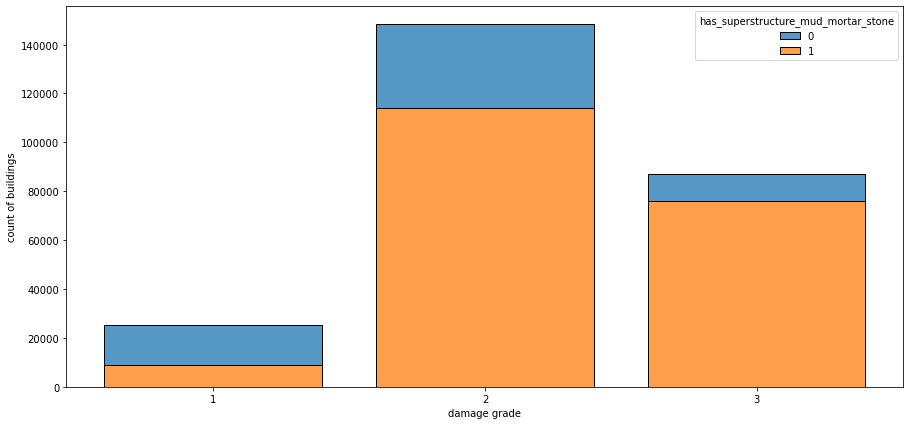

In [119]:
#Building our histogram.
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=combined_df, x='damage_grade', color='orange', hue='has_superstructure_mud_mortar_stone', multiple="stack", bins=[1,2,3,4], 
                 shrink =.8)
ax.set_xlabel('damage grade')
ax.set_ylabel('count of buildings')
plt.xticks([1.5,2.5,3.5], ['1','2','3'])

plt.show();

Okay, majority of the homes that were destroyed with damage level 2&3 were built by mortar stone.

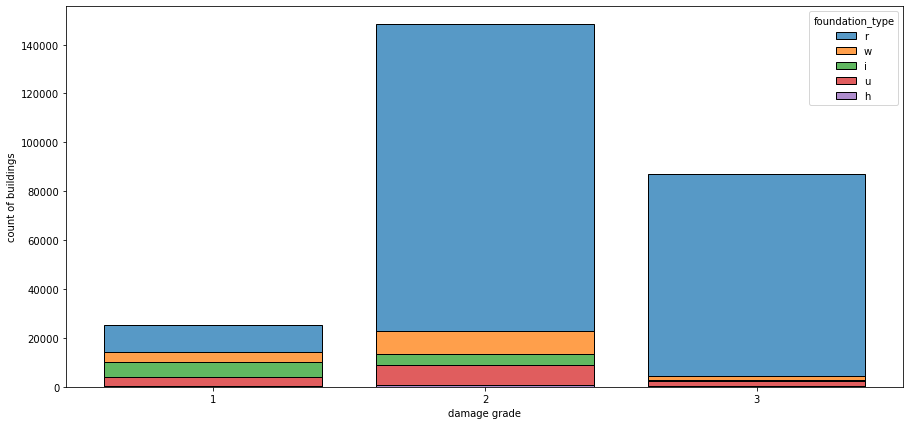

In [120]:
#Building our histogram.
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=combined_df, x='damage_grade', color='orange', hue='foundation_type', multiple="stack", bins=[1,2,3,4], 
                 shrink =.8)
ax.set_xlabel('damage grade')
ax.set_ylabel('count of buildings')
plt.xticks([1.5,2.5,3.5], ['1','2','3'])

plt.show();

It seems that foundation **'r'** was the most prevelant and got hit the worst with the level 2 & 3 damage. 

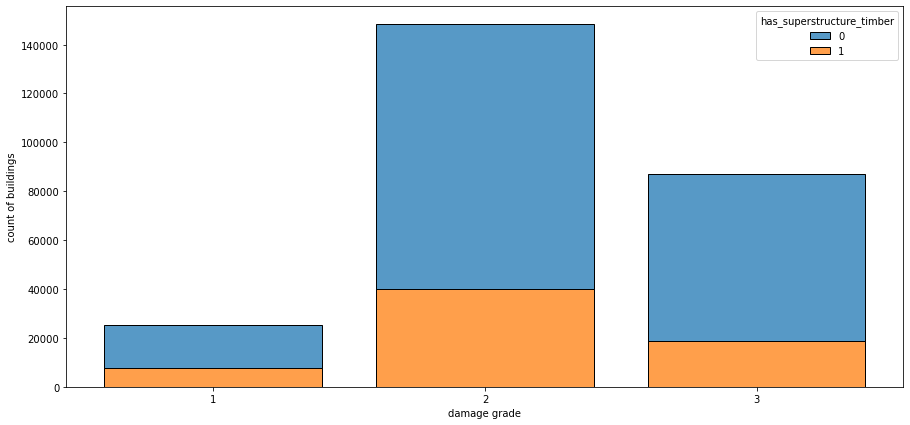

In [121]:
#Building our histogram.
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=combined_df, x='damage_grade', color='orange', hue='has_superstructure_timber', multiple="stack", bins=[1,2,3,4], 
                 shrink =.8)
ax.set_xlabel('damage grade')
ax.set_ylabel('count of buildings')
plt.xticks([1.5,2.5,3.5], ['1','2','3'])

plt.show();

Okay, timber was not as prevelant as mortar stone, but majority of the damages with buildings made out of timber were level 2.

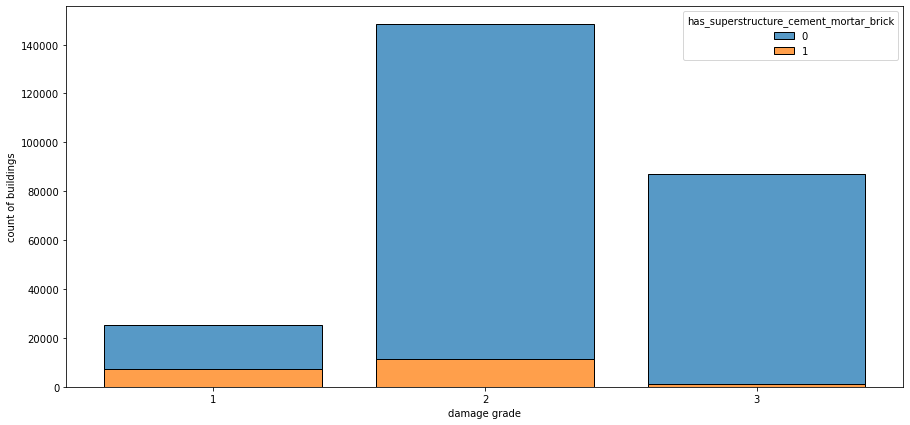

In [122]:
#Building our histogram.
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=combined_df, x='damage_grade', color='orange', hue='has_superstructure_cement_mortar_brick', multiple="stack", bins=[1,2,3,4], 
                 shrink =.8)
ax.set_xlabel('damage grade')
ax.set_ylabel('count of buildings')
plt.xticks([1.5,2.5,3.5], ['1','2','3'])

plt.show();

Looks like brick held on it's own. The damage level is low across all 3 damage grades. 

## Correlation

Awesome, we got our **Feature_importance** and with our top 5 features, let's see if we can find a correlation with these features.

In [124]:
#Creating our new dataframe to build a correlation based off of our top 5 Features.
combined_df_3 = combined_df_2.drop(columns=['geo_level_2_id', 'land_surface_condition','roof_type', 'ground_floor_type','has_superstructure_adobe_mud', 
                         'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 
                          'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 
                           'has_superstructure_rc_engineered', 'has_superstructure_other'])
combined_df_3

,geo_level_1_id,foundation_type,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_timber,damage_grade
0,6,r,1,0,0,3
1,8,r,1,0,0,2
2,21,r,1,0,0,3
3,22,r,1,0,1,2
4,11,r,0,0,0,3
...,...,...,...,...,...,...
260596,25,r,1,0,0,2
260597,17,r,1,0,0,3
260598,17,r,1,0,0,3
260599,26,r,0,1,0,2


In [125]:
#Renaming our columns for better readability.
combined_df_3 = combined_df_3.rename(columns={'has_superstructure_mud_mortar_stone': 'mud_mortar_stone',
                                              'has_superstructure_cement_mortar_brick': 'cement_mortar_brick', 
                                           'has_superstructure_timber': 'timber'  })

In [126]:
#Gathering our categorical data because that is what we will be using for this project.
data_types_3 = {'geo_level_1_id': 'categorical',
             'foundation_type':'categorical',
             'has_superstructure_mud_mortar_stone':'categorical',
             'has_superstructure_cement_mortar_brick':'categorical',
             'has_superstructure_timber':'categorical',
              'damage_grade':'categorical'

             
             
             }

interval_cols_3 = [col for col, v in data_types_3.items() if v=='interval' and col in data.columns]
interval_cols_3

[]

In [127]:
#Creating a dataframe based off of the correlation.
phik_overview_3 = combined_df_3.phik_matrix(interval_cols = interval_cols_3)
phik_overview_3.round(2)

,geo_level_1_id,foundation_type,mud_mortar_stone,cement_mortar_brick,timber,damage_grade
geo_level_1_id,1.00,0.57,0.60,0.38,0.37,0.60
foundation_type,0.57,1.00,0.45,0.42,0.28,0.37
mud_mortar_stone,0.60,0.45,1.00,0.67,0.06,0.20
cement_mortar_brick,0.38,0.42,0.67,1.00,0.09,0.17
timber,0.37,0.28,0.06,0.09,1.00,0.04
damage_grade,0.60,0.37,0.20,0.17,0.04,1.00


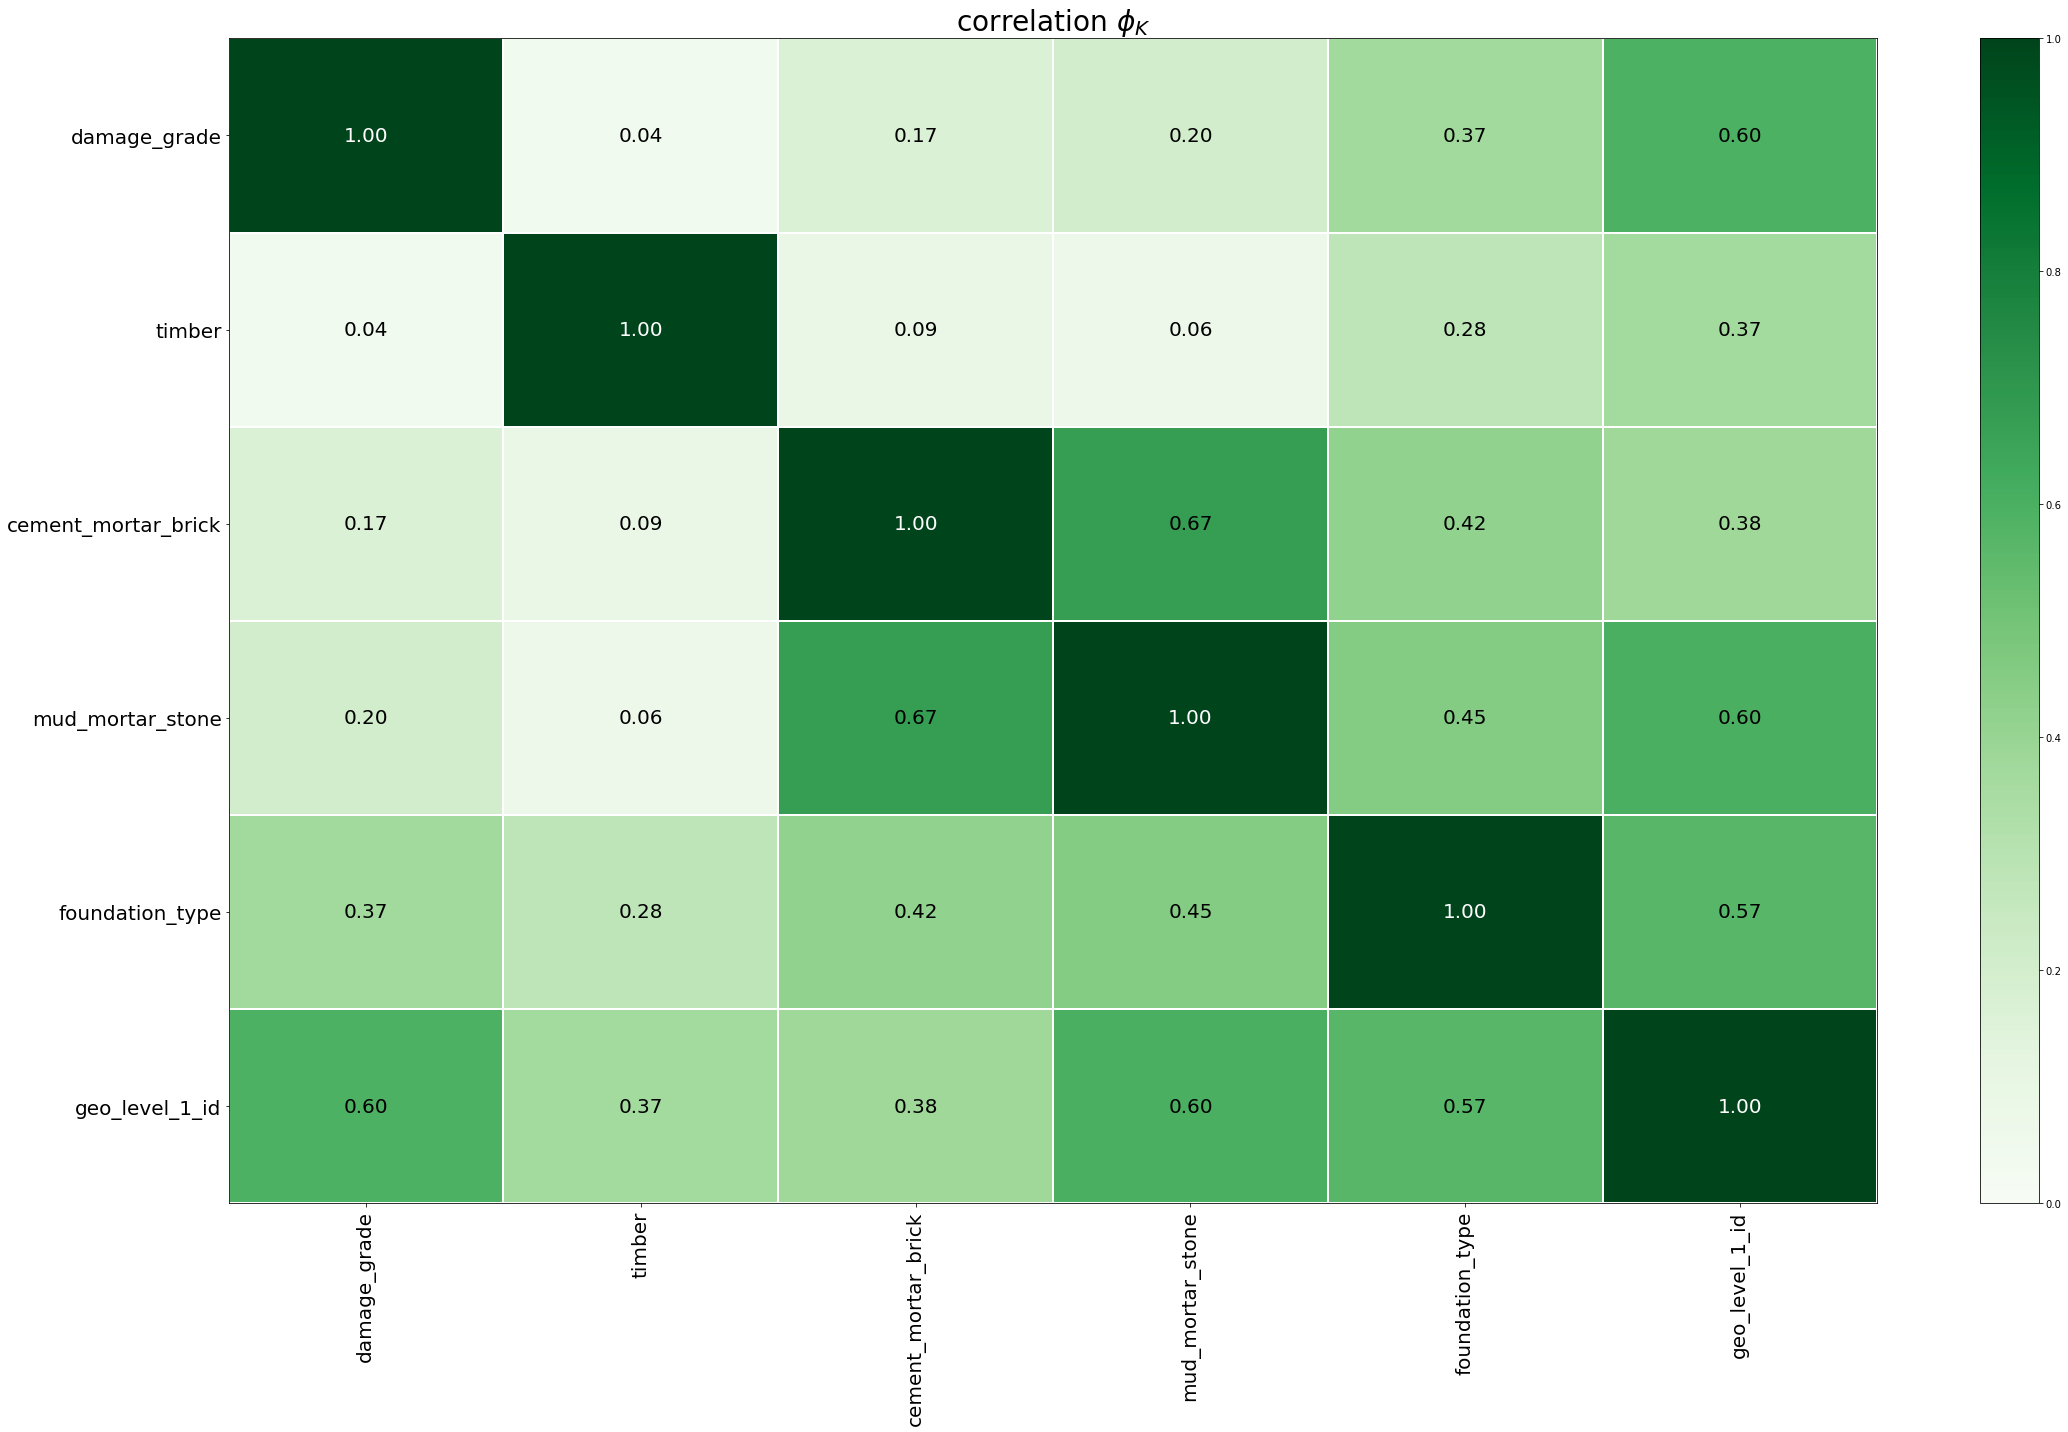

In [129]:
#Pulling up our heatmap based off of our correlation!
plot_correlation_matrix(phik_overview_3.values, 
                        x_labels=phik_overview_3.columns, 
                        y_labels=phik_overview_3.index, 
                        vmin=0, vmax=1, color_map='Greens', 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=2, 
                        figsize=(32, 20))
plt.tight_layout()

### Interpretation 
---------------------------------------------
Our **feature_importance** showed us the top 5 features that make the biggest impact on predicting our target. I was able to see the building materials and the impact they had on our damage_grades. A good chunk of the buildings that were destroyed were created out of **mud_mortar_stone** so I could see the significance of this feature. The correlation was a positve correlation in regards to the target. 

Foundation **'r'** looked like it was the most prevelant and it looks like it got hit the worst with the level 2 & 3 damage compared to other foundations. The correlation was also one of the strongest compared to the other features. 

**Timber** got me a little confused because not only is the correlation the weakest out of the 5, structurally, not many homes were built out of this material. This was a great learning lesson because it taught me that in the real world, we all are going to cross some data that we will have a hard time interpreting. Given more time, I would research more into this feature. 

Just like **timber**, **cement_mortar_brick** wasn't prevelant in our building structures as many buildings were not made of this material, but the correlation was also on the weaker side. This is also data that I would have to dig deeper into as well. 

# Conclusion 
-------------------------------------------------------
In the end, I built a predictive model using the Micro F1-Score off of the 2015 earthquake in Nepal using information from [Driven Data](https://www.drivendata.org/competitions/57/nepal-earthquake/). I was able to do some data cleaning and I made a dataframe and using that dataframe, I built a pipeline and I was able to use multiple algorithms for my categorical data. A lot of my models took a lot of computational power, and I even ended up cutting my grid search short. 

Overall, I got a micro- F1 score that crossed over 70% and I was pleased with that. The model I decided to run with was my **Random Forest** because it gave me my best score. I was able to pull out the best features and I was able to see a correlation to see the impact that my features had on my prediction. I was also able to build a histogram to see if the certain building materials were prevalent in earthquake damages. There is definitely much more that I could've explored but that's just something I will have to do later when I have more time and save enough money to buy a super computer. Overall, the location of the city matters, the closer you are to the epicenter, the more likely the damage will be more detrimental. I believe this model could save lives by reinforcing homes that are closer to earthquake disaster areas and start by building off of bricks ,try not to build your home off of mud_mortar_stonem, and if your foundation is built off of **'r'**, I would try to reinforce that either with **u** or **i**. 

# Limitation
----------------------------
I was limited with computing power. One of models ran for more than 13 hours and I was not able to pull out the results. Next time, I will need a stronger computer and hopefully more money so I can spend money on Google Co-Lab. 

# Next Steps
---------------------

- Gather more information on my data 
    - My data has some information that doesn't make any sense as they only give us one lettered answers. I would dig further into this data and see if I can translate my data into something that is translatable.
- Explore more of the data
    - Spend more time doing EDA. Play around with the features and see if I can improve my scores.
    - Try and see if I can find more datasets that could help improve my model. 
- Run more models
    - Run more grid searches and play around with my models too. Obviously we want to try for a better score.
- Invest more money into Nepal
    - Nepal is ranked [100](https://countryeconomy.com/gdp/nepal#:~:text=The%20GDP%20figure%20in%202020,2019%2C%20when%20it%20was%20%241%2C195.) in the world. Millions of dollars have been poured into the country, but almost 10 years after the earthquake, the country is still struggling trying to get back onto it's feet.
    - Help funding for homes using ground_floor_type 'v', and for any homes made of mud_mortar_stone, try your best to reinforce it, and for any new homes being built you can use brick to help withstand the damages.